# League of Legends & Data Science – (Projeto end-to-end) prevendo o resultado de partidas

Esse é um projeto definido como end-to-end, ou melhor, um projeto de ponta a ponta, e essa é uma das melhores formas de colocar em prática os ensinamentos aprendidos dentro da ciência de dados, passando por todas as etapas que precisam ser realizadas comumente em todo projeto que envolve a ciência dos dados.

O objetivo desse projeto é que seja possível de prever partidas de league of legends, mais especificamente, as chances de quem está no lado azul do mapa vencer. A ideia também é de transformar esse projeto que por enquanto é algo simples, em um projeto maior e que de alguma forma possa ser útil para quem for jogar uma partida de League of Legends.
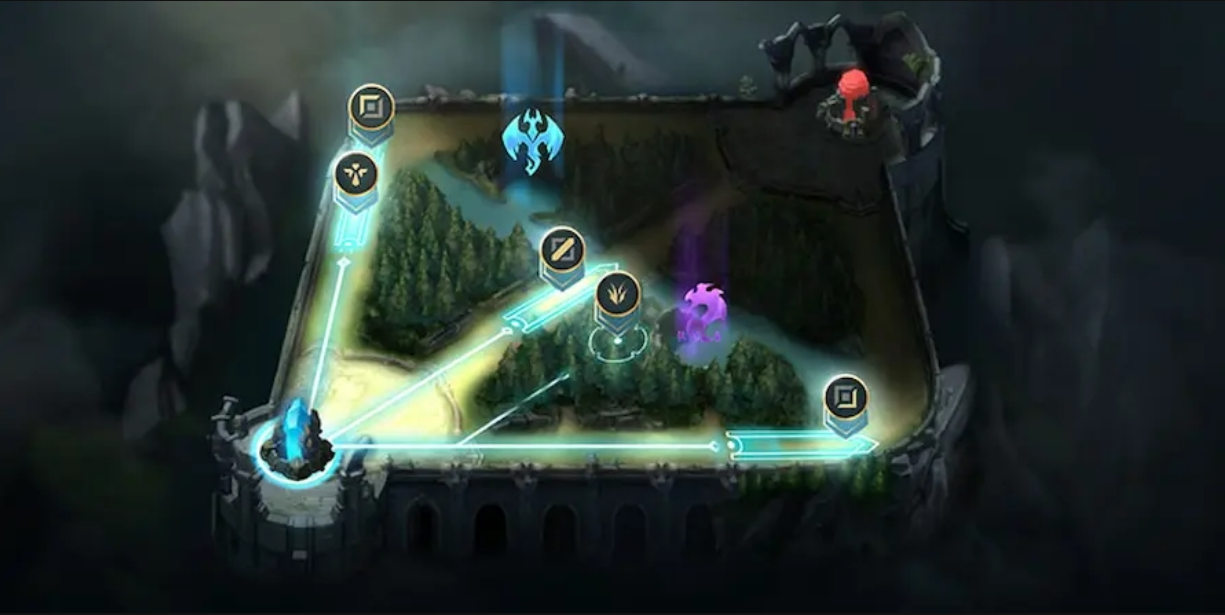

Para construir uma solução em Ciência de Dados e principalmente de Machine Learning, é preciso que o problema de negócio, o contexto que os dados estão inseridos e o próprio conjunto de dados esteja claro para quem está construindo o projeto.

A relação com o problema de negócio que envolve os dados que será trabalhado, deve ser o mais amigável possível, e foi justamente por esse motivo que escolhi trabalhar com um conjunto de dados do jogo League of Legends, por já jogar o jogo a um tempo e ter um entendimento sobre o contexto que o conjunto de dados está envolvido, assim fica mais fácil de realizar a análise dos dados e construção do modelo.

Então, é a partir do entendimento do problema que iniciaremos o projeto, com o objetivo de construir uma solução para tentar prever a vitória de quem está jogando pelo lado azul do mapa.

As etapas que serão construídas e compõem este projeto end-to-end, tem o objetivo de não só construir uma boa solução, como também uma forma de aprendermos mais sobre os tópicos que serão vistos, as etapas dos projetos são elas:

# Etapas do Projeto
- Entendimento do Problema
     1. Aprendizado Supervisionado por Regressão ou Classificação


- Coleta do dados
     1. Contexto dos dados


- Pré-processamento e Manipulação dos dados
     1. Verificar dados ausentes
     2. Verificar o tipo das colunas
     3. Deletar colunas
     4. Dividindo o conjunto de dados em lado azul e lado vermelho
     5. Verificando dados duplicados
     6. Verificando dados desbalanceados
     7. Outliers


- Exploração e visualização dos dados
     1. Exploração Estatística Descritiva Univariada
     2. Exploração Estatística Descritiva Multivariada


- Modelagem e Avaliação de Modelos
     1. Seleção de Variaveis e Redução de Dimensionalidade
     2. Modelagem e Avaliação do Modelo
         A. Construindo um modelo com XGBClassifier
         B. AutoML com Pycaret
         C. Avaliação do modelo e Métricas de avaliação de um Classficador


- Conclusão
     1. Prever e Salvar o modelo
     2. Declarações Finais


# Entendimento do Problema
Historicamente, o lado azul tem um winrate incrivelmente alto em League of Legends. Na Fase de Grupos do Mundial de 2016, que não teve seed ou escolha de lados, o lado azul teve um winrate de 60%. Equipes optam pelo lado azul em parte por conta das vantagens de terreno, para ganks ou divings na rota inferior para circundar o acampamento dos krugs.

A rota mais curta e o acesso fácil ao Azul também permitem que o time impeça que o midlaner inimigo tenha a habilidade de constantemente "spammar" feitiços se conseguirem avançar mais no lado azul na rota inferior.

Por esse motivo, nossa variavel alvo acaba sendo a chance do lado azul do mapa vencer ou não. A coluna blueWins é a variável alvo (o valor que estamos tentando prever, o valor 1 significa que o time azul venceu. 0 caso contrário.

Os campeões (personagens) do jogo, ficam mais fortes obtendo experiência para subir de nível e adquirindo ouro para comprar itens mais poderosos conforme a partida progride. Manter a atenção nesses dois fatores é crucial para superar a outra equipe e destruir a base inimiga.

Por esse motivo, em nosso conjunto de dados vamos trabalhar com as variáveis que potencializam esses dois fatores e ajudam a chega na vitória, para que assim, possamos prever a vitória de quem joga pelo lado azul do mapa.

- É possível de ganhar experiência abatendo unidades e Campeões inimigos, dando assistência em abates e destruindo estruturas inimigas.

- É possível de ganhar ouro abatendo unidades e Campeões inimigos, dando assistência em abates, destruindo estruturas inimigas ou equipando itens de acúmulo de ouro.

# Aprendizado Supervisionado por Regressão ou Classificação
O nosso problema trata-se de um problema mais básico de classificação, que envolve duas classes, que podemos chamar de classe positiva e classe negativa (o que significa ser positivo ou negativo depende da semântica do problema).

E esse tipo de tarefa é chamada de classificação binária. Por exemplo, temos a tarefa de classificar nossos dados em duas classes: vitória do time do lado azul ou derrota. Nesse cenário, como estamos interessados em encontrar as chances de "vitória do time do lado azul", pode ser interessante considerar a classe positiva como sendo as "vitórias do time do lado azul", enquanto a classe de derrotas é considerada negativa.

Entenda que, a partir de um ponto de vista geométrico, o problema da classificação pode ser visto como a tarefa de se traçar fronteiras de decisão (decision boundaries) entre as regiões que caracterizam cada classe. Um novo ponto é classificado observando a classe da região onde ele se encontra.

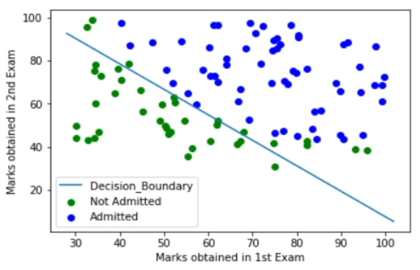

In [317]:
from PIL import Image
from IPython.display import display, HTML
from io import BytesIO
import requests

url = "https://user-images.githubusercontent.com/110730862/227371921-9f8d7228-b143-44af-b384-5c413277f03c.png"
response = requests.get(url)
imagem = Image.open(BytesIO(response.content))
nova_imagem = imagem.resize((420, 270))
display(nova_imagem)

Observe, que a imagem está representando duas classes, uma verde e outra azul, e isso poderia se encaixar facilmente no nosso problema de vitória ou derrota. O que o classificador fez foi traçar a fronteira de decisão, representada na figura pela linha azul, entre as duas classes, separando o espaço de features em duas regiões.

Finalizando o entendimento, para o classificador, todos os pontos acima da fronteira (linha azul) são considerados como sendo da classe azul, enquanto todos os pontos abaixo da fronteira são considerados como sendo da classe verde. Porém, note como alguns pontos verdes encontram-se acima da fronteira e isso acontece, obviamente, porque o classificador comete erros.

Para cada diferente tipo de acerto e erro, um classificador recebe um nome e podemos determinar algumas métricas de avaliação de um classficador a partir deles. Para um classificador binário (o que envolve nosso problema), podemos construir uma matriz de confusão, que sumariza os acertos e erros de um classificador. Mas isso veremos mais na frente na avaliação do nosso modelo.


# Coleta dos Dados
Os dados foram coletados a partir da plataforma Kaggle, que trata-se de uma comunidade de Data Science e Machine Learning, onde além de ser realizada competições da área, é possivel encontrar dados e projetos de outros usuários.

O conjunto de dados pode ser encontrado [aqui](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min)

# Contexto dos dados
Este conjunto de dados contém os primeiros 10 minutos, com estatísticas de aproximadamente 10k jogos classificados (SOLO QUEUE) de um alto ELO (DIAMOND I a MASTER). Os jogadores têm praticamente o mesmo nível entre esses dois elos.

Há 19 recursos (variáveis) por equipe (40 no total) coletados após 10 minutos de jogo. Isso inclui mortes, ouro, experiência, nível... Mas isso os recursos podem aumentar, se fizermos alguma engenharia de recursos para obter mais insights, como está planejado ao projeto.

# Dicionário dos dados
Ter o entendimento do que cada variável (recurso) significa é de extrema importância, por isso é sempre bom descrever cada variável, antes de se iniciar o projeto de fato. Lembrando, que nossa variável alvo acaba sendo a vitória do time do lado azul ou não, na partida.

- Warding totem/Totem de proteção (Sentinela): Um item que um jogador pode colocar no mapa para revelar a área próxima. Muito útil para controle de mapa / objetivos.

- Minions: NPC que pertencem a ambas as equipes. Eles dão ouro quando mortos por jogadores.

- Jungle minions/Animais da selva: NPCs que NÃO pertencem a nenhuma equipe. Eles dão ouro e buffs quando mortos por jogadores.

- Elite monsters/Monstro de elite (Barão): Monstros com alto HP / dano que dão um bônus massivo (ouro / XP / estatísticas) quando mortos por uma equipe.

- Dragons/Dragões: Monstro de elite que dá bônus de equipe quando morto. O quarto dragão morto por uma equipe dá um bônus de estatísticas massivo. O quinto dragão (Dragão Ancião) oferece uma grande vantagem para a equipe.

- Herald/Arauto: Monstro de elite que dá bônus de estatísticas quando morto pelo jogador. Isso ajuda a empurrar uma pista e destrói estruturas.

- Towers/Torres: estruturas que você deve destruir para alcançar o Nexus inimigo. Eles dão ouro.

- Level/Nível: nível de campeão. Comece em 1. O máximo é 18.

# Primeiros passos (Configurações iniciais)

Para iniciar o projeto, precisamos primeiro importar as bibliotecas e algumas delas são essenciais, como a biblioteca Pandas, uma das principais, tendo em vista a necessidade de manipular e analisar os dados.

In [202]:
# Importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

#Configurar o notebook
sns.set_style('darkgrid');

#Alterando estilo do matplolib
plt.style.use('ggplot');

# Leitura do arquivo

Antes de importarmos o conjunto de dados com o pandas, deve ser feita uma leitura do conjunto de dados, retirando algumas informações básicas sobre: "Como os dados estão separados?", "Qual o tamanho do arquivo", "Quantos registros possuem?", "Vai demorar para o Google colab ler o arquivo?". Essas perguntas são importantes para que verificarmos se é necessário utilizar algum parâmetro ao importar o conjunto de dados com o Pandas.

Abrindo o arquivo, obviamente, foi possivel identificar que se trata de um arquivo no formato CSV, os dados estão separados por "," e possue 9879 linhas, ou seja, se trata de um conjunto de dados de tamanho pequeno, comparado ao mundo real, porém para esse projeto pode ser considerado um pouco grande e talvez seja necessário trabalharmos com uma amostra do conjunto dos dados mais pra frente.

In [203]:
df = pd.read_csv('https://raw.githubusercontent.com/MarcioPereira10/League-of-Legends/main/high_diamond_ranked_10min.csv')

Se observado, a leitura dos dados foi feita de maneira correta e agora sabemos que o conjunto de dados possue 9879 linhas ou variáveis e 40 entradas ou colunas. Por mais que pareça algo simples e insignificante, essas informações dão uma noção e entendimento importante para as próximas etapas, como a etapa de deletar colunas ou dados que não serão usados na análise.

In [204]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {df.shape[0]}')
print(f'Número de entradas ou colunas {df.shape[1]}')

Número de linhas ou variaveis 9879
Número de entradas ou colunas 40


Se observado, a leitura dos dados foi feita de maneira correta e agora sabemos que o conjunto de dados possue 9879 linhas ou variáveis e 40 entradas ou colunas. Por mais que pareça algo simples e insignificante, essas informações dão uma noção e entendimento importante para as próximas etapas, como a etapa de deletar colunas ou dados que não serão usados na análise.

# Pré-Processamento e Manipulação dos dados
A etapa de pré-processamento dos dados ou limpeza e preparação dos dados é uma das mais importantes de todo projeto de Data Science ou Machine Learning. Nessa etapa, os dados precisam ser manipulados e tratados, sendo a biblioteca Pandas a principal por desempenhar esse papel. A etapa se dá de forma continua, podendo acontecer durante todo o projeto e não apenas em sua fase especifica, também é a etapa que mais demanda tempo do cientista ou analista de dados. O pré-processamento de dados envolve muito tratamento dos dados e nem tudo será visto nesse projeto.

A limpeza e manipulação dos dados nesse projeto pode parecer algo muito simples e que inicialmente não tem significado, porém, nos casos reais os dados dificilmente virão tratados, limpos e organizados. Por isso, tanto se fala que essa etapa é a etapa que mais se demanda tempo. Sendo a responsável por fazer uma amostra limpa dos dados, para que assim os dados possam ser utilizados em etapas futuras, como na análise exploratória dos dados, onde os dados precisam estar limpos e organizados para ganharem significados.

In [205]:
#O conjunto de dados
df.head(10)

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   
5  4475365709         1               18                   0               0   
6  4493010632         1               18                   3               1   
7  4496759358         0               16                   2               0   
8  4443048030         0               16                   3               0   
9  4509433346         1               13                   1               1   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   
5          5           3            6                  1            1  ...   
6          7           6            7                  1            1  ...   
7          5          13            3                  0            0  ...   
8          7           7            8                  0            0  ...   
9          4           5            5                  1            1  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   
5                   0         15201          7.0               18060   
6                   0         14463          6.4               15404   
7                   0         17920          6.6               16938   
8                   0         18380          7.2               19298   
9                   0         16605          6.8               18379   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   
5                    221                           59         -698   
6                    164                           35        -2411   
7                    157                           54         2615   
8                    240                           53         1979   
9                    247                           43         1548   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  
5               -101         22.1         1520.1  
6              -1563         16.4         1446.3  
7                800         15.7         1792.0  
8                771         24.0         1838.0  
9               1574         24.7         1660.5  

[10 rows x 40 columns]

Inicialmente, é importante que se busque avaliar como os dados estão se comportando, quais são as primeiras e últimas linhas do conjunto de dados e como cada coluna está representada. Perguntas como essas são importante por começarem a dar um entendimento e informação sobre o conjunto de dados e chegarmos na análise exploratoria já com boas ideias de hipoteses.

Por isso, iniciamos com o método .head() para ter um entendimento das primeiras linhas, e em seguida utilizaremos os métodos .tail() que apresenta as útilas linhas do conjunto de dados e o método .sample() que apresenta uma amostra dos registros dos dados.

In [206]:
#Últimas 10 linhas do conjunto de dados
df.tail(10)

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
9869  4527875317         0               12                   1   
9870  4527811425         1               46                   2   
9871  4527715781         0               12                   2   
9872  4527650398         1               12                   0   
9873  4527878058         1               18                   2   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
9869               0          9          12           12                  1   
9870               1          5           3            2                  0   
9871               0          4           5            5                  2   
9872               1          7           7            9                  0   
9873               1         12           6           13                  0   
9874               1          7           4            5                  1   
9875               0          6           4            8                  1   
9876               0          6           7            5                  0   
9877               1          2           3            3                  1   
9878               1          6           6            5                  0   

      blueDragons  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
9869            1  ...                   0         18319          7.4   
9870            0  ...                   0         14949          6.8   
9871            1  ...                   0         15858          6.8   
9872            0  ...                   0         16399          7.0   
9873            0  ...                   0         15934          6.6   
9874            1  ...                   0         15246          6.8   
9875            1  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            1  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
9869               19287                    187                           68   
9870               18046                    202                           64   
9871               17873                    248                           48   
9872               18001                    216                           58   
9873               17027                    197                           38   
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
9869         2121               1038         18.7         1831.9  
9870        -1974              -1712         20.2         1494.9  
9871          727               -343         24.8         1585.8  
9872         -756                 -1         21.6         1639.9  
9873        -2639              -2364         19.7         1593.4  
9874        -2519              -2469         22.9         1524.6  
9875         -782               -888         20.6         1545.6  
9876         2416               1877         26.1         1831.9  
9877          839               1085         24.7         1529.8  
9878         -927                 58         20

Outro ponto importante é ter um resumo estatístico inicial e um primeiro entendimento sobre as distribuições dos dados, isso pode ser feito através do método .describe()

In [207]:
#Resumo estatístico 
df.describe()

gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000     4.000000     4.000000     4.000000   
50%          1.000000     6.000000     6.000000     6.000000   
75%          1.000000     8.000000     8.000000     9.000000   
max          1.000000    22.000000    22.000000    29.000000   

       blueEliteMonsters  blueDragons  ...  redTowersDestroyed  redTotalGold  \
count        9879.000000  9879.000000  ...         9879.000000   9879.000000   
mean            0.549954     0.361980  ...            0.043021  16489.041401   
std             0.625527     0.480597  ...            0.216900   1490.888406   
min             0.000000     0.000000  ...            0.000000  11212.000000   
25%             0.000000     0.000000  ...            0.000000  15427.500000   
50%             0.000000     0.000000  ...            0.000000  16378.000000   
75%             1.000000     1.000000  ...            0.000000  17418.500000   
max             2.000000     1.000000  ...            2.000000  22732.000000   

       redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
count  9879.000000         9879.000000            9879.000000   
mean      6.925316        17961.730438             217.349226   
std       0.305311         1198.583912              21.911668   
min       4.800000        10465.000000             107.000000   
25%       6.800000        17209.500000             203.000000   
50%       7.000000        17974.000000             218.000000   
75%       7.200000        18764.500000             233.000000   
max       8.200000        22269.000000             289.000000   

       redTotalJungleMinionsKilled   redGoldDiff  redExperienceDiff  \
count                  9879.000000   9879.000000        9879.000000   
mean                     51.313088    -14.414111          33.620306   
std                      10.027885   2453.349179        1920.370438   
min                       4.000000 -11467.000000       -8348.000000   
25%                      44.000000  -1596.000000       -1212.000000   
50%                      51.000000    -14.000000          28.000000   
75%                      57.000000   1585.500000        1290.500000   
max                      92.000000  10830.000000        9333.000000   

       redCSPerMin  redGoldPerMin  
count  9879.000000    9879.000000  
mean     21.734923    1648.904140  
std       2.191167     149.088841  
min      10.700000    1121.200000  
25%      20.300000    1542.750000  
50%      21.800000    1637.800000  
75%      23.300000    1741.850000  
max      28.900000    2273.200000  

[8 rows x 40 columns]

Muita das vezes precisamos entender de forma estatística o conjunto de dados, com informações como: desvio padrão, média, valor mínimo e valor máximo. Então por isso utilizamos o método describe, responsável por retornar esse tipo de informação, tão importante para uma análise.

# Verificar dados ausentes
Os dados ausentes em sua maioria podem ocorrer devido a não-resposta, ou seja, nenhuma informação foi registrada para uma variável, sendo mais um dos problemas de sujeira que pode aparecer em um dataset, os dados ausentes precisam ser limpados e tratados, de modo que deixem de ser dados ausentes e passem a ganhar significado. Dessa forma, antes de limpar e tratar os dados ausentes, primeiro é preciso identificar se existe a presença de dados ausentes ou faltantes no conjunto de dados.

Para identificar a presença de dados ausentes, eu poderia ter usado o método isnull(), porém para sempre manter as boas práticas ao utilizar a biblioteca pandas, é interessante utilizar o método isna(), devido que o final "na" do método remete ao dropna e fillna, que são metodos que também trabalham de alguma forma com dados ausentes.

In [208]:
#Identificando a presença de dados ausentes
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

Novamente, volto a dizer que isso dificilmente deve acontecer em um problema real. Vale resaltar também, que pode acontecer de uma coluna ter todos os seus dados registrados, porém alguns serem dados ausentes (de forma oculta), ou seja, é informado pelo método que o conjunto de dados não possui valores ausentes ou nulos, por todos os dados estarem registrados corretamente. Entretanto, o dado registrado pode não ter valor significativo e os dados não passarem nenhuma informação útil. Casos como esse de dados ausentes ocultos, acontece em sua maioria quando quem coleta os dados e constroi o conjunto de dados não tem o valor ou informação exata e faz o registro de dados com um valor qualquer, como 0. Então é importante, se entendido que necessário, uma análise dos registros mais cuidadosa.

# Verificando o tipo das colunas
Assim como pode ser feito registro de dados sem nenhum significado, por quem constroi o conjunto de dados, as colunas também podem ser preenchidas de forma incorreta, ou seja, uma coluna que trata-se de uma coluna do tipo inteira, pode estar como coluna do tipo float ou até mesmo string.

In [209]:
#Verificando os tipos das colunas
df.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [210]:
#Quantidade de tipos das colunas
df.dtypes.value_counts()

int64      34
float64     6
dtype: int64

Se por exemplo, fosse necessário alterar o tipo de alguma coluna, poderia ser utilizado o método astype(), principal método para realizar essa tarefa, passando o novo tipo da coluna como parâmetro.

# Deletando colunas
Dependendo do seu tamanho, um conjunto de dados em muito dos casos possuem colunas que não são uteis para o objetivo do projeto, até mesmo mais de dez colunas que estão ali apenas ocupando um espaço. Consequentemente, os dados dessas colunas só estão ocupando espaço de memoria e dificultando a análise dos dados.

De acordo com as informações disponíveis nos dados, existem duas equipes Vermelha e Azul. Uma vez que ambas as equipes estão jogando uma contra a outra, há uma correlação negativa entre as características atribuídas à equipe Azul e as características atribuídas à equipe Vermelha.

Portanto, temos duas opções para contornar:

Prever os "blueWins" com base nas características (variaveis) apenas do lado azul.

Prever os "blueWins" com base nas características (variaveis) apenas da equipe vermelha.

Se avaliarmos, vamos entender que todas as variaveis (colunas), tanto do time vermelho como time azul podem ser importantes para a etapa de análise exploratória, por esse motivo, vamos dividir o conjunto de dados dos jogos por lados, lado azul e lado vermelho.

In [211]:
#As colunas que pertencem ao conjunto de dados
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

Dessa forma, agora iremos deletar apenas a coluna "gameId", que não será útil para o projeto.

O Pandas é uma biblioteca que suas ações em sua maioria podem ser realizadas de diversas formas, ou seja, pode ser utilizado mais de um método ou atributo para realizar algo. Logo, é importante que sejam mantidas boas práticas ao usar a biblioteca. Um exemplo é que para deletar as colunas, poderia ser utilizado tanto o método .drop() ou o método .copy().

O método drop é recomendado quando temos certeza que queremos deletar a coluna do conjunto de dados, tendo em vista, que a coluna é deletada permanentemente do conjunto de dados e posteriormente, se necessário, eu não consegueria trabalhar com essa coluna.

Por isso, quando estou trabalhando com um conjunto de dados onde não tenha certeza sobre a necessidade que eu vou ter de usar uma coluna ou não posteriormente, a forma que considero melhor de se deletar as colunas é após ter sido feita uma análise de quais colunas são importantes para o objetivo do projeto. Selecionar as colunas que se deseja utilizar com CTRL + C através do atributo df.columns e posteriormente passar um array com os nomes das colunas que desejamos, na ordem desejada e utilizar o método .copy(). Assim, as outras colunas serão omitidas e não deletadas.

In [212]:
#Deletando a coluna gameId
df.drop(["gameId"], axis = 'columns')

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0               28                   2               1   
1            0               12                   1               0   
2            0               15                   0               0   
3            0               43                   1               0   
4            0               75                   4               0   
...        ...              ...                 ...             ...   
9874         1               17                   2               1   
9875         1               54                   0               0   
9876         0               23                   1               0   
9877         0               14                   4               1   
9878         1               18                   0               1   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0             9           6           11                  0            0   
1             5           5            5                  0            0   
2             7          11            4                  1            1   
3             4           5            5                  1            0   
4             6           6            6                  0            0   
...         ...         ...          ...                ...          ...   
9874          7           4            5                  1            1   
9875          6           4            8                  1            1   
9876          6           7            5                  0            0   
9877          2           3            3                  1            1   
9878          6           6            5                  0            0   

      blueHeralds  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
0               0  ...                   0         16567          6.8   
1               0  ...                   1         17620          6.8   
2               0  ...                   0         17285          6.8   
3               1  ...                   0         16478          7.0   
4               0  ...                   0         17404          7.0   
...           ...  ...                 ...           ...          ...   
9874            0  ...                   0         15246          6.8   
9875            0  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            0  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
0                  17047                    197                           55   
1                  17438                    240                           52   
2                  17254                    203                           28   
3                  17961                    235                           47   
4                  18313                    225                           67   
...                  ...                    ...                          ...   
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
0            -643                  8         19.7         1656.7  
1            2908               1173         24.0         1762.0  
2            1172               1033         20.3         1728.5  
3            1321                  7         23.5         1647.8  
4            1004               -230         22.5         1740.4  


# Dividindo o conjunto de dados em lado azul e lado vermelho

In [213]:
#Conjunto de dados do lado azul
id_list=["Wins","WardsPlaced","WardsDestroyed","FirstBlood","Kills","Deaths","Assists","EliteMonsters","Dragons","Heralds","TowersDestroyed","TotalGold","AvgLevel","TotalExperience","TotalMinionsKilled","TotalJungleMinionsKilled","GoldDiff","ExperienceDiff","CSPerMin","GoldPerMin"]
lado_azul=[]
lado_azul=pd.DataFrame(lado_azul)
for i in id_list:
    lado_azul[i]=df["blue"+i]

In [214]:
#Conjunto de dados do lado vermelho
id_list=id_list[1:]
lado_vermelho=[]
lado_vermelho=pd.DataFrame(lado_vermelho)
wins=[0 if each == 1 else 1 for each in lado_azul["Wins"]]
lado_vermelho["Wins"]=wins
for i in id_list:
    lado_vermelho[i]=df["red"+i]

Dessa forma, posteriormente podemos trabalhar de forma independente tanto com o conjunto de dados dos jogos do lado azul, como jogos pelo lado vermelho.

# Verificando dados duplicados
Outra tarefa importante na etapa de limpeza e preparação de dados é a correção de dados duplicados, por mais que, possivelmente, esse conjunto de dados não possua dados duplicados, por o conjunto de dados já está um pouco limpo, é comum encontrar em alguns conjuntos de dados. Os valores duplicados na maioria dos conjuntos de dados são encontrados com frequência e dependendo da análise que será feita, esses valores podem alterar o resultado final.

In [215]:
#Verificando dados duplicados
duplicados = df.duplicated()
print(duplicados.any() == 1)

False


O dataset não possui dados duplicados como mencionado anteriormente, porém, caso fosse identificado a presença de dados duplicados, seria necessário remover todos os valores repetidos, fazendo o uso do método drop_duplicates() ou uma outra técnica.

# Verificando dados desbalenceados
Algo comum é lhe dar com dados desbalanceados nos conjuntos de dados, porém, principalmente em problemas de classificação, quando não temos um equilíbrio entre os registros da nossa coluna alvo, nesse caso blueWins, o nosso modelo irá acabar apresentando um falso "bom desempenho".

Por exemplo, considere o caso onde existe uma classe A, majoritária, representada por 98% do data set, enquanto a classe B, minoritária, representa apenas 2%. Se o classificador sempre classificar um novo dado como sendo da classe A, ele acertará, no conjunto de treino, 98% das vezes. Claro que esse bom desempenho é ilusório.

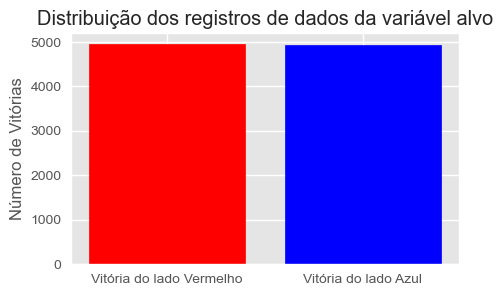

In [216]:
#Gráfico para a distribuição dos registro de dados

#Configurações
labels = ['Vitória do lado Vermelho', 'Vitória do lado Azul']
vitoria_vermelho = len(df.blueWins[df['blueWins']==0])
vitoria_azul = len(df.blueWins[df['blueWins']==1])
vitorias = (vitoria_vermelho, vitoria_azul)

#Plotar o gráfico
fig = plt.figure(figsize=(5,3))
ax = plt.bar(labels, vitorias)
plt.ylabel('Número de Vitórias')
plt.title('Distribuição dos registros de dados da variável alvo')
ax[0].set_color('red')
ax[1].set_color('blue')
plt.show()

In [217]:
#Contagem dos registros da coluna alvo (blueWins)
df.blueWins.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

Apesar do time vermelho ter ganho 19 jogos a mais do que o time azul, isso apenas para os aproximadamente 10k jogos classificados (SOLO QUEUE) de um ELO alto (DIAMOND I para MASTER), nossa variavel alvo possui uma distribuição considerada igualitária, porém, se caso tivéssemos dados desbalanceados, deveriamos balanceá-los primeiro.

E as técnicas mais comuns para balanceamento de dados é através de reamostragem (resampling). Podendo ser feito de duas formas básicas:

Undersampling: removemos dados da classe majoritária;
Oversampling: reamostramos dados da classe minoritária;
Obviamente, existiriam muitas outras tarefas a serem realizadas, mas infelizmente, esse conjunto de dados, não é um conjunto de dados que apresenta muitos problemas nos registros de seus dados, logo, não é necessária uma limpeza profunda do conjunto dos dados.

# Outliers
Os outliers, são os famosos "pontos fora da curva" ou observações que não parecem seguir o mesmo padrão dos demais dados. Normalmente apresentando distribuições diferentes. Identificar e tratar os outliers é de suma importância, devido que os outliers influenciam diretamente nas análises e nos algoritmos, ao apresentar comportamento distoante do resto do data set.

Impactando tanto na média e variância, como nas funções de perda e custo.

Após os outliers terem sido identificados, sua remoção ou transformação só deve ser feita se realmente fizer sentido, logo, deve ser levado em consideração que alguns outliers são dados autenticos e devem ser estudados com atenção, para saber se de fato deve ser feita sua remoção

Novamente vamos utilizar o método describe, agora mais focado em tentar identificar se existem dados discrepantes no conjunto de dados. Então, ao analisar o resultado estatistico fornecido pelo método describe, precisamos observar o quão os valores, por exemplo, valor min e o valor máximo estão distantes (discrepantes).

In [218]:
#Resumo estatístico
df.describe()

gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000     4.000000     4.000000     4.000000   
50%          1.000000     6.000000     6.000000     6.000000   
75%          1.000000     8.000000     8.000000     9.000000   
max          1.000000    22.000000    22.000000    29.000000   

       blueEliteMonsters  blueDragons  ...  redTowersDestroyed  redTotalGold  \
count        9879.000000  9879.000000  ...         9879.000000   9879.000000   
mean            0.549954     0.361980  ...            0.043021  16489.041401   
std             0.625527     0.480597  ...            0.216900   1490.888406   
min             0.000000     0.000000  ...            0.000000  11212.000000   
25%             0.000000     0.000000  ...            0.000000  15427.500000   
50%             0.000000     0.000000  ...            0.000000  16378.000000   
75%             1.000000     1.000000  ...            0.000000  17418.500000   
max             2.000000     1.000000  ...            2.000000  22732.000000   

       redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
count  9879.000000         9879.000000            9879.000000   
mean      6.925316        17961.730438             217.349226   
std       0.305311         1198.583912              21.911668   
min       4.800000        10465.000000             107.000000   
25%       6.800000        17209.500000             203.000000   
50%       7.000000        17974.000000             218.000000   
75%       7.200000        18764.500000             233.000000   
max       8.200000        22269.000000             289.000000   

       redTotalJungleMinionsKilled   redGoldDiff  redExperienceDiff  \
count                  9879.000000   9879.000000        9879.000000   
mean                     51.313088    -14.414111          33.620306   
std                      10.027885   2453.349179        1920.370438   
min                       4.000000 -11467.000000       -8348.000000   
25%                      44.000000  -1596.000000       -1212.000000   
50%                      51.000000    -14.000000          28.000000   
75%                      57.000000   1585.500000        1290.500000   
max                      92.000000  10830.000000        9333.000000   

       redCSPerMin  redGoldPerMin  
count  9879.000000    9879.000000  
mean     21.734923    1648.904140  
std       2.191167     149.088841  
min      10.700000    1121.200000  
25%      20.300000    1542.750000  
50%      21.800000    1637.800000  
75%      23.300000    1741.850000  
max      28.900000    2273.200000  

[8 rows x 40 columns]

Após observar os valores retornados pelo método describe, é interessante analisar de forma individual a coluna de Wards Colocadas (blueWardsPlaced e redWardsPlaced).

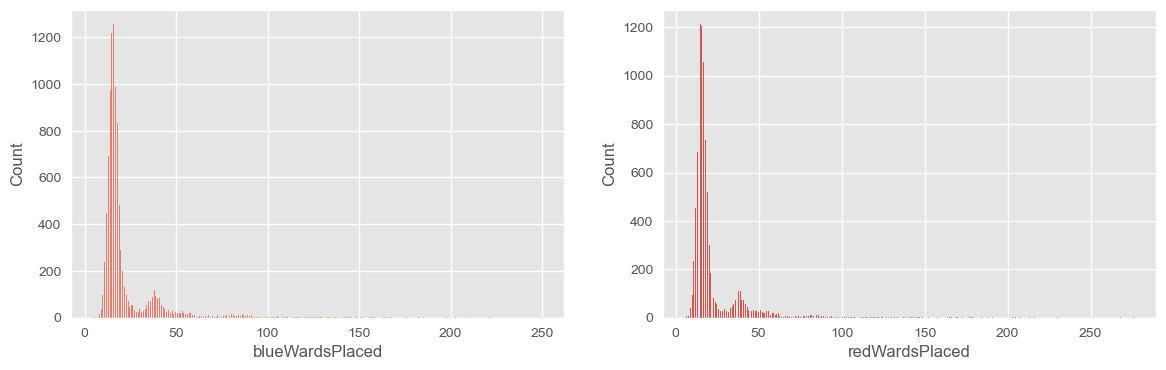

In [219]:
#Gráfico para as variáveis de Wards colocadas
dados = df[['blueWardsPlaced', 'redWardsPlaced']]

#Plotando o gráfico
fig,ax = plt.subplots(1,2,figsize=(14,4))
sns.histplot(x="blueWardsPlaced",data=dados,ax = ax[0])
sns.histplot(x="redWardsPlaced",data=dados,ax = ax[1],color="r")
plt.show()

Lembrando que nosso conjunto de dados está representando apenas os 10 minutos iniciais de partida, logo, não é normal colocar mais de 12 sentinelas nos primeiros dez minutos, então isso acaba sendo estranho, com possivelmente alguns ouliers no conjunto de dados.

O nosso objetivo é avaliar se realmente existe outliers na coluna de wards colocadas, e se sua remoção deve ser feita. Para identificar a presença de outliers é preciso analisar, entender e verificar a distribuição dos dados, como fizemos com o gráfico de histograma, mas é possivel ter um entendimento ainda melhor com gráfico o de boxplot.

# Boxplot
Box plots são gráficos para visualização da distribuição de uma variável através de seus quantis. Sendo uma forma ágil de enxergar a distribuição dos dados, sem ter que recorrer a histogramas ou gráficos de densidade.

O seu gráfico em forma de retângulo contém barras que se prolongam para fora dele, e os dados mais extremos, ou seja, os outliers, são mostrados como pontos fora do alcance das suas barras (os whiskers).

Para entendermos melhor como funciona a análise de um box plot e a identificação de outliers, observe a figura abaixo: 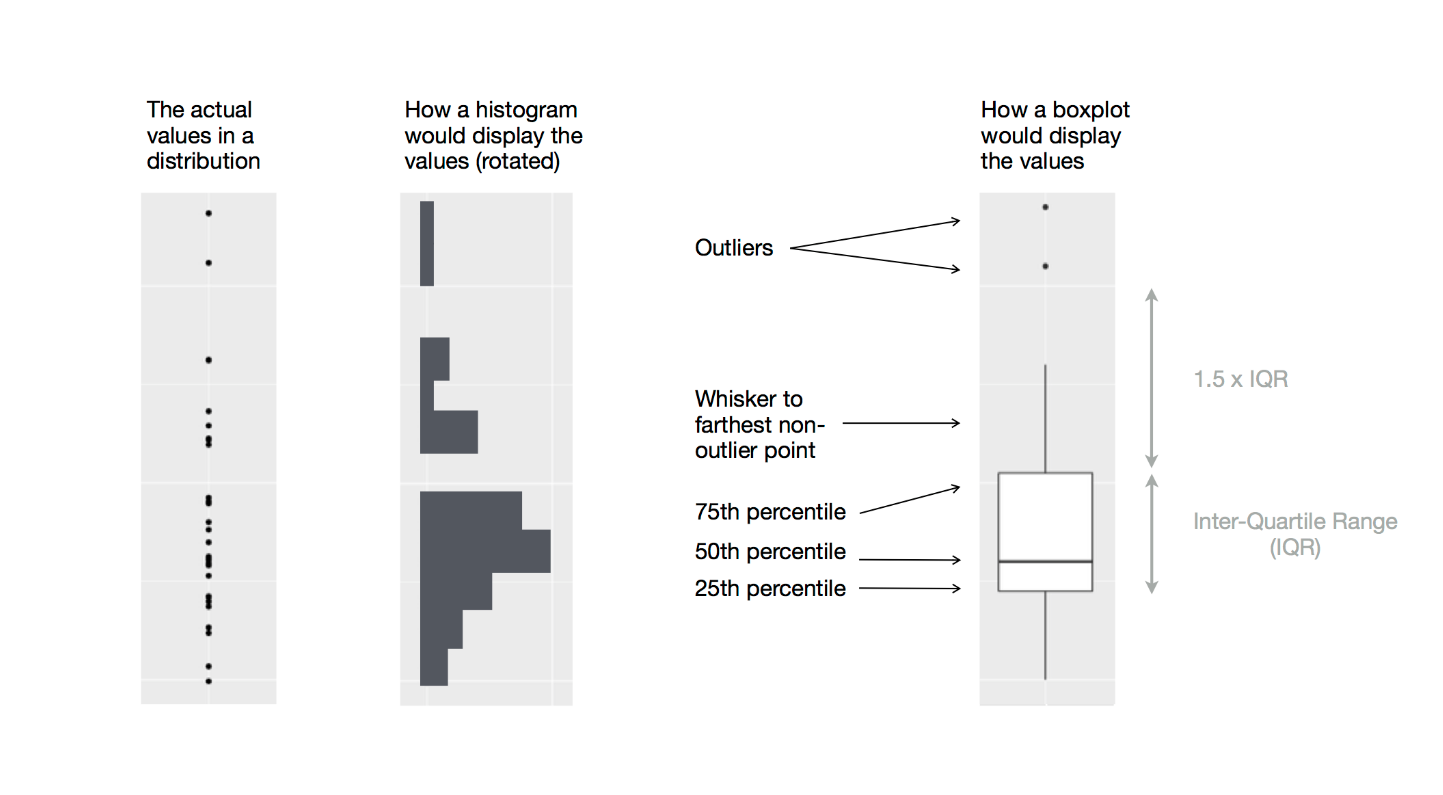

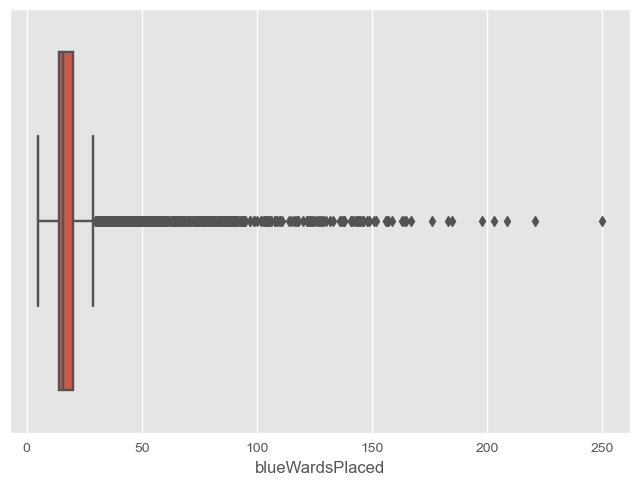

In [220]:
#Plotando gráfico de boxplot para o lado azul
sns.boxplot(x=df["blueWardsPlaced"], orient="vertical");

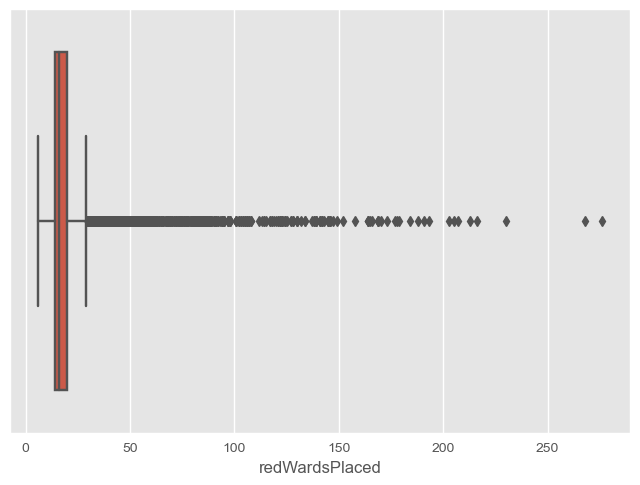

In [221]:
#Plotando gráfico de boxplot para o lado vermelho
sns.boxplot(x=df["redWardsPlaced"], orient="vertical");


Neste caso da coluna de wards colocadas é possivel observar que existe muitos pontos (outliers) fora do alcance das barras do boxplot. Então, irei aplicar uma abordagem para identificar quais são esses pontos e se sua remoção deverá será feita.


Porém, vamos focar em identificar possíveis outliers apenas para o lado azul do mapa, visto que possivelmente, iremos utilizar apenas as sua variáveis.

In [222]:
#Construindo o intervalo interquartil
q1 = lado_azul.WardsPlaced.quantile(0.25)
q3 = lado_azul.WardsPlaced.quantile(0.75)

iqr = q3 - q1

In [223]:
#Limite inferior [Q1−1.5×IQR]
out_low = q1 - 1.5 * iqr 
out_low

#Limite superior [Q3+1.5×IQR]
out_high = q3 + 1.5 * iqr 
out_high

print(f'''Limite ou intervalo inferior: {out_low} 
Limite ou intervalo superior: {out_high}''')

Limite ou intervalo inferior: 5.0 
Limite ou intervalo superior: 29.0


Agora que defini quais são os limites inferiores e superiores, é possivel identificar quais são os pontos que encontram-se fora desses limites ou intervalos, ou seja, que podem ser considerados outliers.

In [224]:
#Identificando os outliers presentes
outliers = lado_azul.WardsPlaced[(lado_azul.WardsPlaced < out_low) | (lado_azul.WardsPlaced > out_high)]
outliers

3       43
4       75
11      33
17      43
23      78
        ..
9861    36
9864    57
9865    34
9870    46
9875    54
Name: WardsPlaced, Length: 1627, dtype: int64

In [225]:
#Total de possiveis outliers presentes
outliers.count()

1627

# Remoção de Outliers
Como já dito anteriormente, a remoção dos Outliers só deve acontecer se realmente fizer sentido, e analisando algumas fontes, foi identificado que não é necessário a remoção desses dados discrepantes, e que pode acabar sendo algo comum, vai depender da partida, e por se tratar de partidas de níveis mais altos, os jogadores de fato acabam colocando muitas wards, para obter o máximo de controle de visão possível.

# Exploração e Visualização de dados
Segundo o estatístico John Tukey, a etapa de exploração de dados ou EDA pode ser definida como:

*Procedimentos para analisar dados, técnicas para interpretar os resultados de tais procedimentos, formas de planejar a reunião dos dados para tornar sua análise mais fácil, mais precisa ou mais exata e toda a maquinaria e os resultados da estatística (matemática) que se aplicam a análise de dados*.

A exploração de dados ou EDA pode ser considerada uma das fases mais importantes de todo processo de análise de dados. A partir dela começamos a entender mais sobre os dados que envolve a problematica e conseguentemente construir hipoteses e perguntas. Nessa fase, para ajudar no trabalho de entendimento e exploração dos dados é feito o uso de ferramentas estatísticas e de visualização de dados, para que as informações a respeito dos dados sejam a mais clara possivel. Não deve ser levado em consideração um conjunto de regras e passo a passo na hora de construir a análise exploratoria de dados, pelo contrario, a análise exploratória de dados não se trata de um processo formal e sim um estado de espirito investigativo. Na EDA o mais importante é investigar todas as ideias que ocorrerem, conforme o entendimento e significado dos dados vai aumentando.

Pode-se dizer que a EDA é um ciclo iterativo e ciclico, onde:

É preciso gerar questões relevantes para o negócio, logo, é essencial que em casos reais exista uma conversa com o pessoal da aréa de negocio, a respeito dos dados e o que o pessoal da área de negócio está buscando responder através do conjunto de dados.

- Para encontrar as respostas dos questionamentos levantados é preciso gerar gráficos, manipulação e estatística sobre os dados.

- Refinar os questioanamentos e utiliza-los para gerar novos questionamentos pertinentes.

- Um fator essencial que muita das vezes é negligenciado por quem está começando na área dos dados é a estatistica. A estatística tanto univariada como multivariada é de suma importância para os dados ganharem ainda mais significado, durante a exploração de dados.

# Visualização de dados

Após os dados serem transformados em informação na análise exploratória de dados, a informação ainda precisa se tornar útil para outras pessoas e conseguentemente pode ser utilizada, logo, a visualização de dados tem a responsabilidade de tornar a informação útil e de fácil entendimento, para que outras pessoas possam usar a informação. A etapa de visualizacao de dados está dentro da exploração de dados, com o objetivo de transmitir a informação retiradas dos dados e trata-se de uma das etapas mais importantes da análise exploratória.

A visualização de dados pode ser definida dentro da ciência de dados como, "A formação de imagens visuais mentais para transmitir informações através de representações gráficas de dados". De acordo com o Edward Tufte que é pioneiro no campo do desenvolvimento de visualizações efetivas e escreveu vários livros sobre o assunto, uma boa visualização de dados precisa seguir três regras:

- Integridade gráfica;
- Maximizar a proporção de dados e tinta;
- Evitar lixo gráfico.

A integridade gráfica está relacionada a parte obscura da visualização de dados, onde não devemos através da visualização de dados e estatística buscar enganar ou trapacear quem está visualizando o gráfico.

Para a regra de maximizar a proporção de dados e tintas deve ser levado em conta que quanto mais simples e claro um gráfico for, melhor, o famoso "menos é mais". Um dos problemas principais que envolvem a regra de maximização são os famosos gráficos de pizza e 3D. O principal problema de um gráfico de pizza e 3D são suas análises ser de difícil entendimento, tendo em vista, que não somos bons em fazer comparações de área.

A terceira regra de evitar lixo gráfico se trata de evitar elementos visuais estranhos ou que não tenham nenhum objetivo e que possam acabar distraindo quem está visualizando o gráfico, por mais que pareça algo simples, é essencial.

Agora de fato, e finalmente, vamos começar a explorar e construir visualizações de dados

# Exploração Estatística Descritiva Univariada
Uma das estatística que se pode aplicar na EDA é a estatística descritiva univariada. A estatítica descritiva univariada pode ser aplicada quando se está interessado em estabelecer medidas que resumem quantitivamente uma variável, logo, essas medidas dirão sobre a tendência de centralidade dos dados e suas dispersões.

**E a partir de agora vamos ter um foco maior para identificar as variáveis do lado azul que podem ser úteis para prever nossa variável alvo "blueWins", sendo 0 para vitória do lado vermelho e 1 para vitória do lado azul**. Realizando uma análise das variaveis pertecentes ao time do lado azul, dessa forma, conseguiremos identificar quais são as variaveis que devemos utilizar na construção do nosso modelo de machine learning para prever a vitória do time que está jogando pelo lado azul, ou seja, nossa variável alvo ter um valor positivo.

Lembrando que tinhamos duas opções para contornar:

- Prever os "blueWins" com base nas características (variaveis) apenas do lado azul.

- Prever os "blueWins" com base nas características (variaveis) apenas da equipe vermelha.

Vamos agora avaliar algumas distribuições da nossa variável alvo para quando o time do lado azul venceu e também perdeu (analisando os atributos do lado vermelho), e começar a entender a importância das variaveis que serão uteis para o nosso modelo. Se identificarmos as variáveis que mais ajudam o time do lado azul a vencer, ou seja, a variável alvo ter um valor positivo, e alimentar o treinamento do modelo com essas variaveis, possivelmente o modelo terá um bom desempenho e precisão.

<Figure size 10000x2400 with 0 Axes>

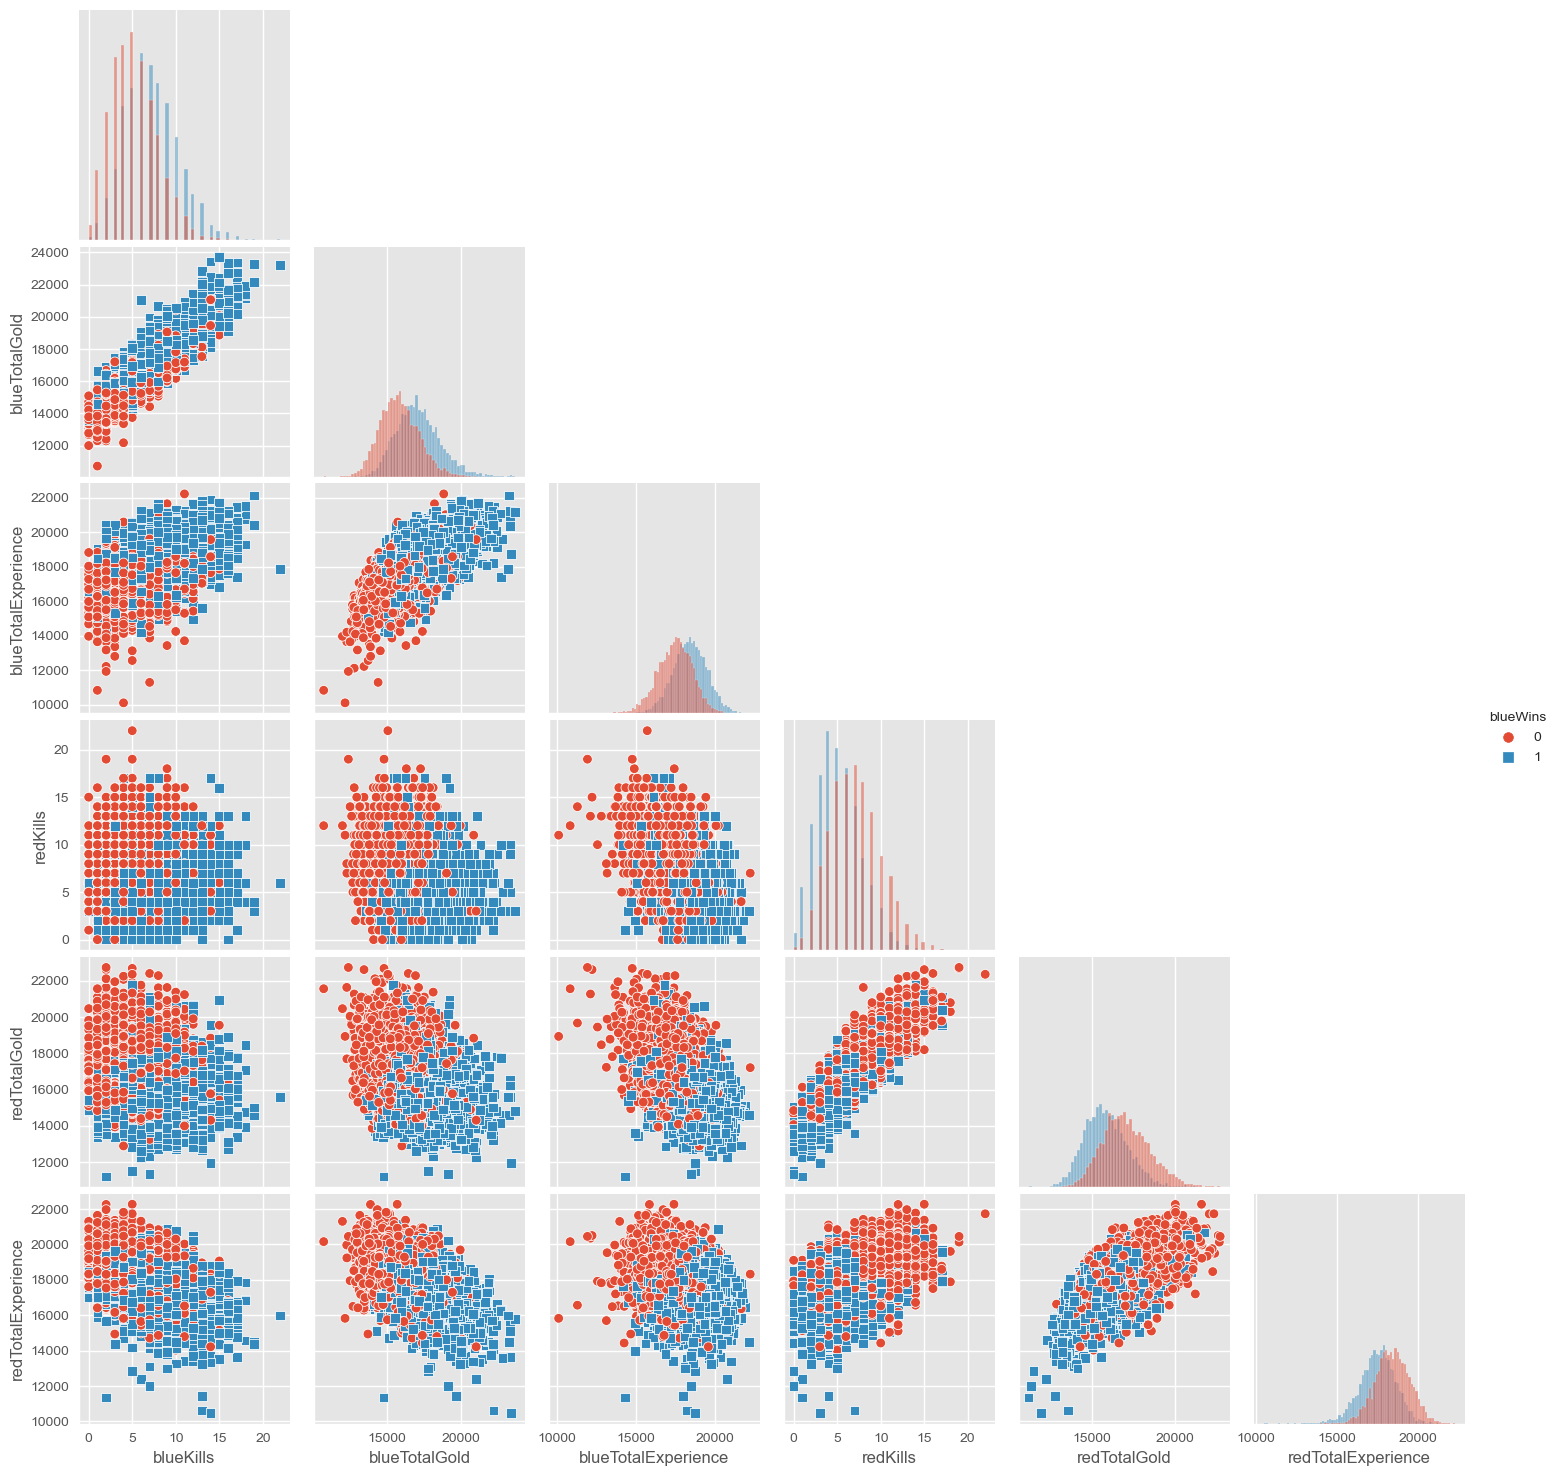

In [226]:
#Primeiramente vamos analisar as distribuições das seguintes variaveis:
x_vars = ["blueKills","blueTotalGold","blueTotalExperience","redKills","redTotalGold","redTotalExperience"]
y_vars = ["blueKills","blueTotalGold","blueTotalExperience","redKills","redTotalGold","redTotalExperience"]

plt.figure(figsize=(100,24))
sns.pairplot(data=df, x_vars=x_vars,y_vars=y_vars, hue='blueWins', corner=True,markers=["o","s"],diag_kind="hist")

plt.show()

Como jogador do league of legends, faz sentindo o gráfico acima, onde quanto mais ouro, mortes e experiência uma equipe tem por jogo, maiores são as chances de vitória.

Quando um jogador abate o inimigo, além de obter mais experiência, ele irá obter ouro e consequentemente irá comprar itens mais caros e de forma mais rápida, obtendo vantagem e podendo chegar a vitória. Isso também se aplica aos outros recursos do jogo como os minions de rota, wards e os monstros da selva.

Todos esses são recursos imprescindível para se chegar a vitória, vamos avaliar a distribuição dos dados para as outras variáveis.

Como vimos no início do projeto:

É possível de ganhar experiência abatendo unidades e Campeões inimigos, dando assistência em abates e destruindo estruturas inimigas.

É possível de ganhar ouro abatendo unidades e Campeões inimigos, dando assistência em abates, destruindo estruturas inimigas ou equipando itens de acúmulo de ouro.

Lembrando que avaliar e entender a comparação dessas variaveis e como estão distribuidas, é de suma importância para a construção do modelo. Entender quais são as variaveis que inplicam no resultado positivo do valor da variavel target (alvo), neste caso a variavel blueWins.

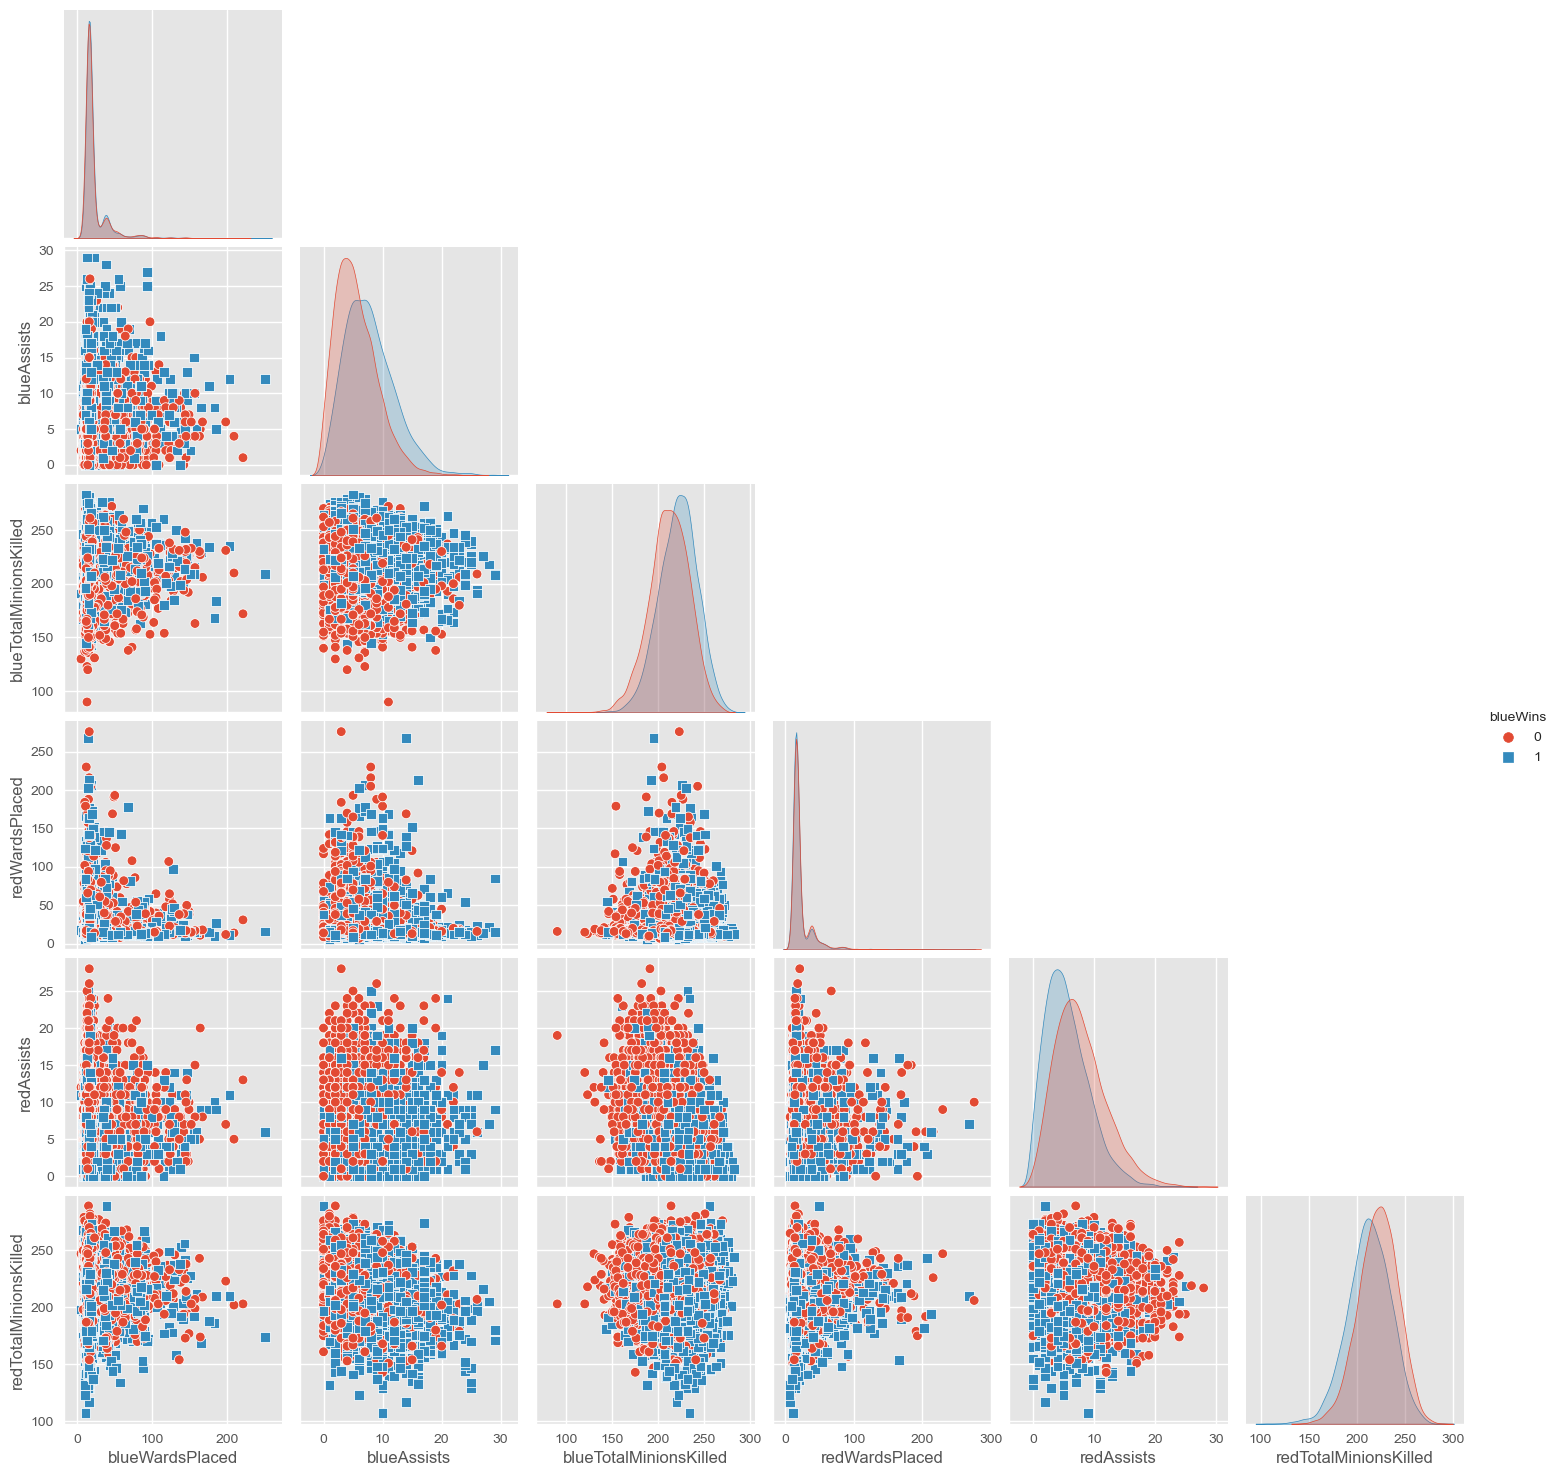

In [227]:
#Agoras vamos analisar e entender as distribuições dos dados das seguintes variaveis:
x_vars = ["blueWardsPlaced","blueAssists","blueTotalMinionsKilled","redWardsPlaced","redAssists","redTotalMinionsKilled"]
y_vars = ["blueWardsPlaced","blueAssists","blueTotalMinionsKilled","redWardsPlaced","redAssists","redTotalMinionsKilled"]

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars,hue="blueWins",corner=True,markers=["o","s"])
plt.show()

Repare na variavel de minions totais abatidos e veja que a quantidade maior está relacionada ao time que saiu vitoriso, algo que as vezes, principalmente, no baixo elo das ranqueadas não é visto como algo que impacta tanto no jogo. Principalmente após os 10min de partidas, o abate de minions tende a diminuir mais.

Agora vamos contruir um gráfico de Violino e Box Plot para visualizar as variaveis com mais potenciais de vitoria do time que está jogando no lado azul. Os gráficos de violino nos permitem visualizar a distribuição de cada recurso de forma simples e pontos de dados separados com base no resultado final de um jogo. Mas antes, vamos definir algumas variáveis, como a variável Y passando a ser nossa variável alvo.

In [228]:
#Construindo uma lista para apenas trabalharmos apenas com o lado azul
drop_cols = ['blueWins','redFirstBlood','redKills','redDeaths','redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']

#Algumas configurações
x = df.drop(drop_cols, axis=1)

#Nossa variável target (alvo)
y = df.blueWins

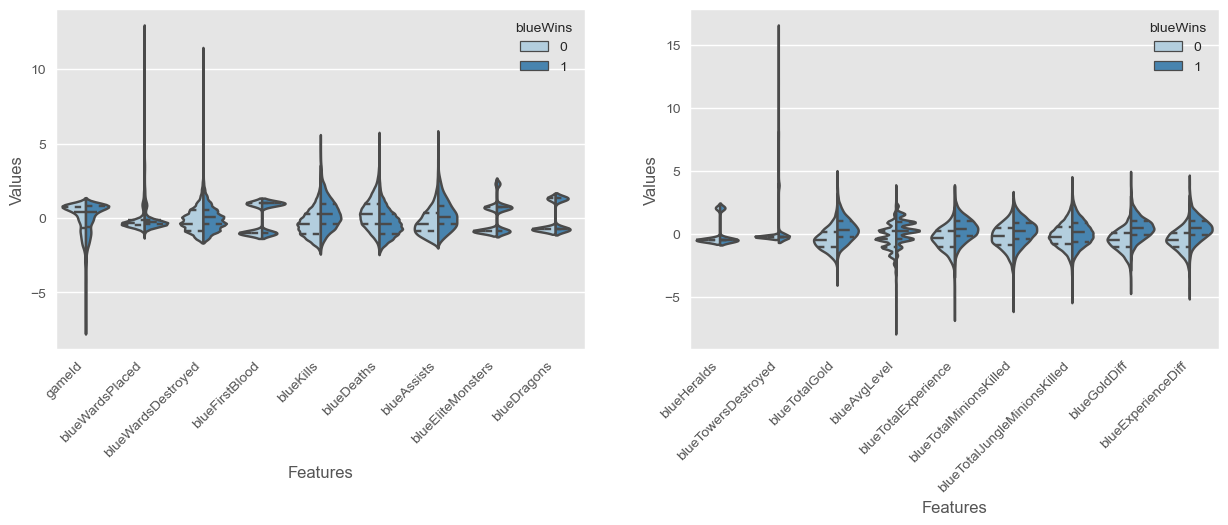

In [229]:
#Realizando algumas configurações para plotar o gráfico
data = x
data_std = (data - data.mean()) / data.std() #realizando uma padronização nos dados
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1) #realizando uma concatenação
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values') 

#Configurações para o gráfico
fig, ax = plt.subplots(1,2,figsize=(15,5))

#Construindo o gráfico violin para as variáveis que definimos
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

#Realizando algumas configurações para plotar o segundo gráfico
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

##Construindo o segundo gráfico violin para as variáveis restantes
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()

Observações a serem feitas:

- Blue kills parece ter um grande impacto positivo na vitória do jogo.
Da mesma forma, as mortes azuis têm um grande impacto negativo na vitória do jogo (ou seja, positivo na derrota).

Blue assiste tem um enredo semelhante a blue kills, precisa obter kills para obter assistências para escalar com kills.

- O primeiro abate está positivamente correlacionado com o resultado, mas também reflete mortes pelo azul.

- As diferenças de ouro e experiência têm grande influência.

- Monstros da selva parece não ter muito impacto

# Kill / Death / Assist (KDA)
As primeiras colunas que vamos observar são as colunas que podem ser utilizadas mais pra frente na Engenharia de Recursos, para criar novas variáveis para o nosso modelo, e que dessa forma ele tenha um melhor aprendizado.

É comumente utilizado como métrica de análise de vitória, principalmente nos campeonatos de League of Legends, o famoso KDA. Mas como funciona o cálculo do KDA? O KDA basicamente funciona como a média de abates e assistências por mortes.

Então podemos adicionar um recurso chamado KDA, que é representado como KDA = (Kills + Assistências) / Mortes.

Text(0.5, 1.0, '% de Vitória por frequência de KDA')

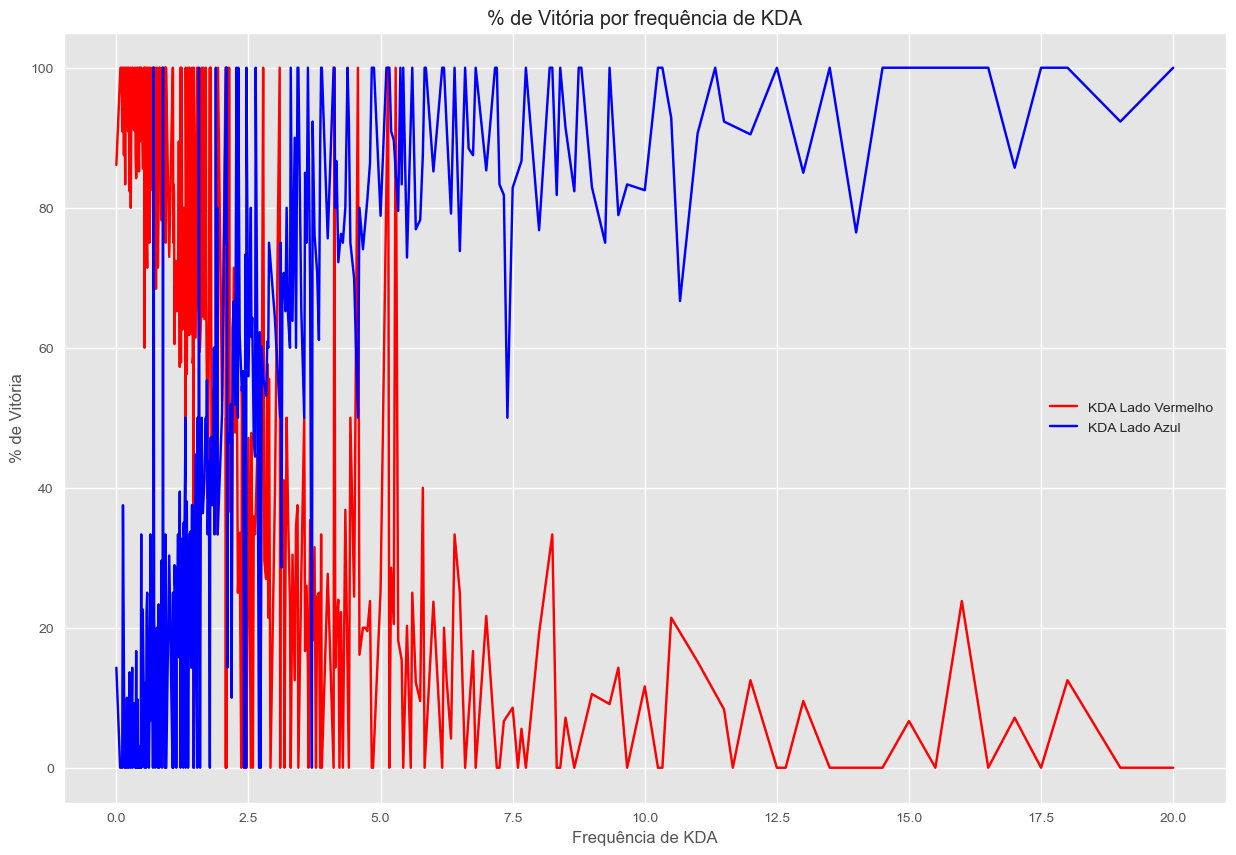

In [230]:
#Tornando o KDA um novo atributo
df['blueKDA'] = ((df["blueKills"] + df["blueAssists"]) / df["blueDeaths"])

df['redKDA'] = ((df["redKills"] + df["redAssists"]) / df["redDeaths"])


#Agrupando o KDA para cada equipe
df_redKDA = df[(df['redKDA'] <= 20)].groupby(by=['redKDA'])
df_blueKDA = df[(df['blueKDA'] <= 20)].groupby(by=['blueKDA'])

#Calculando a probabilidade de ganhar de acordo com o KDA
#Frequência de vitória de acordo com KDA / Frequência para cada KDA * 100
redKDA_rate = (df_redKDA.blueWins.sum() / df_redKDA.blueWins.count() * 100)
blueKDA_rate = (df_blueKDA.blueWins.sum() / df_blueKDA.blueWins.count() * 100)

#Construindo o gráfico
fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data=redKDA_rate, label='KDA Lado Vermelho', color='red')
sns.lineplot(data=blueKDA_rate, label='KDA Lado Azul', color='blue')
ax.set_xlabel('Frequência de KDA')
ax.set_ylabel('% de Vitória')
ax.set_title('% de Vitória por frequência de KDA')

Observe que o intervalo 0,0 ao 5,0 nos mostra as razões KDA mais comuns obtidas em jogos classificados como diamante. Além disso, ajuda as equipes / jogadores a verem como, quando a proporção de KDA da equipe azul aumenta, a probabilidade de a equipe vermelha vencer diminui rapidamente.

Através do site de estatísticas GOL.gg, do último CBLOL (Campeonato Brasileiro de League of Legends) é possivel de observar que o top3 de jogadores com maiores KDA, pertencem aos dois time que conseguiram chegar na final do campeonato.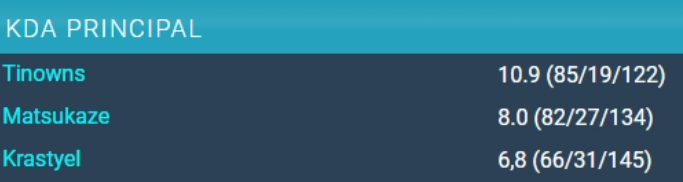

# Gold por minuto e Abates
Quem não lembra do famoso ex-jogador Yoda, falando a frase icônica em sua análise "aquele famoso farm perfeito, 10 de farm por minuto, 100 de farm a cada minuto", o que na verdade seria 10 de farm por minuto e 100 de farm para cada 10 minuto de partida. Mas o quanto será que farmar e ganhar ouro por cada minuto chega a ser impactante, e se realmente isso dar a um time uma boa condição de vitória?. Somado a isso, também vamos observar a porcentagem de kills, então o que queremos saber é se a taxa de abates e ouro por minuto impacta na vitória.

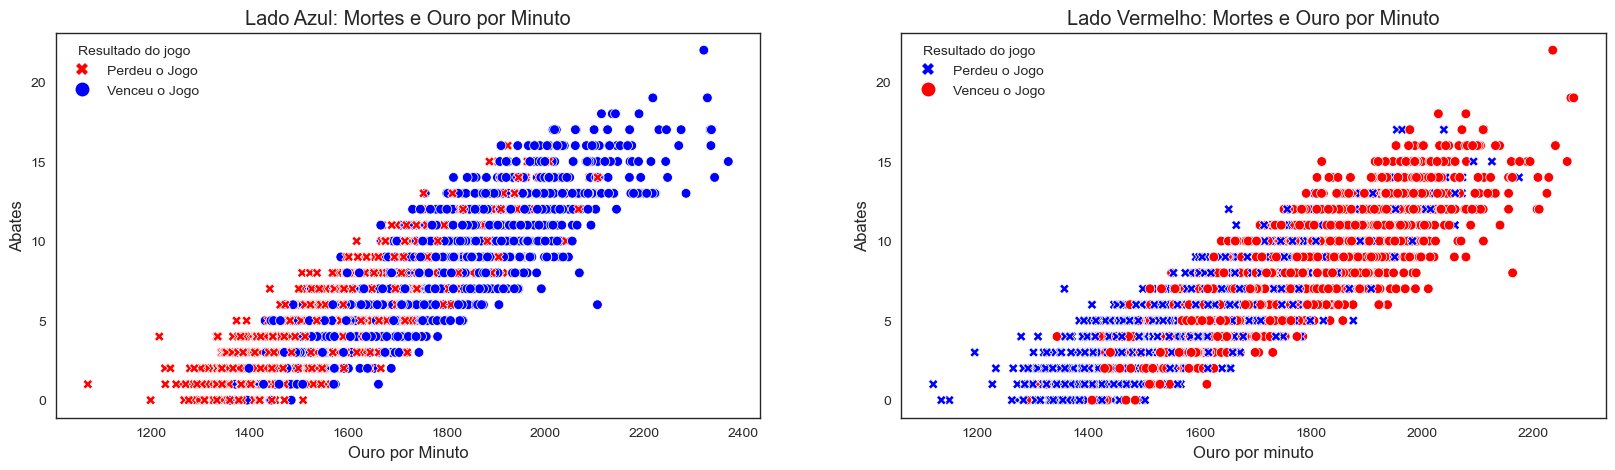

In [231]:
from matplotlib.lines import Line2D


#Realizando configurações para os gráficos
mark1 = {0:"X", 1:"o"}
mark2 = {0:"o", 1:"X"}
legend_elements_1 = [Line2D([0],[0],marker='X',color='w',label='Perdeu o Jogo',markerfacecolor='red',markersize=8),
                     Line2D([0],[0],marker='o',color='w',label='Venceu o Jogo',markerfacecolor='blue',markersize=10)]
legend_elements_2 = [Line2D([0],[0],marker='X',color='w',label='Perdeu o Jogo',markerfacecolor='blue',markersize=8),
                     Line2D([0],[0],marker='o',color='w',label='Venceu o Jogo',markerfacecolor='red',markersize=10)]
plt.subplots(figsize=(20,5))
sns.set_style("white")


#Plotando o primeiro gráfico
plt.subplot(1,2,1)
ax1 = sns.scatterplot(data=df,x='blueGoldPerMin',y='blueKills',hue='blueWins',palette=['red','blue'],style='blueWins',markers=mark1)
ax1.set_title('Lado Azul: Mortes e Ouro por Minuto')
ax1.set_xlabel('Ouro por Minuto')
ax1.set_ylabel('Abates')
ax1.legend(title='Resultado do jogo',handles=legend_elements_1,loc='upper left')

#Plotando o segundo gráfico
plt.subplot(1,2,2)
ax2 = sns.scatterplot(data=df,x='redGoldPerMin',y='redKills',hue='blueWins',palette=['red','blue'],style='blueWins',markers=mark2)
ax2.set_title('Lado Vermelho: Mortes e Ouro por Minuto')
ax2.set_xlabel('Ouro por minuto')
ax2.set_ylabel('Abates')
ax2.legend(title='Resultado do jogo',handles=legend_elements_2,loc='upper left')

plt.show()

Vemos que independente do lado, o famoso farme por minuto é imporante durante os jogos e faz diferença para garantir a vitória.

Acima, temos gráficos de dispersão para o desempenho de cada equipe durante os jogos que ganharam / perderam. O eixo x representa a média de ouro por minuto e o eixo y representa o número de mortes. Em ambos os gráficos de dispersão, vemos o mesmo padrão do número mais alto que a mata e a média de ouro por minuto alcançada por uma equipe, geralmente leva à vitória do jogo.

# Taxa de vitória por eliminação de objetivos
Algo básico que todo jogador de League of Legendes sabe ou deveria saber é que o mais importante dentro do jogo é o controle e realização dos objetivos, como dragão e arauto, mas o quanto eles podem ser relevantes para a vitória.

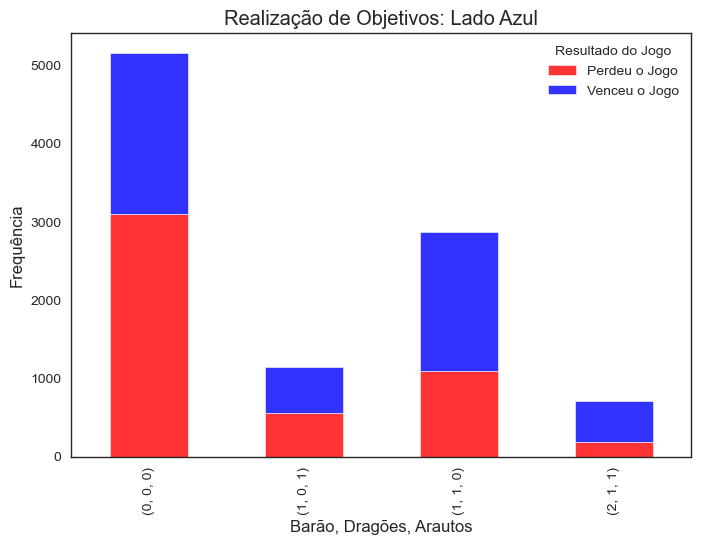

In [232]:
#Unindos as variáveis/colunas que serão utilizadas
obj_blue = pd.crosstab([df['blueEliteMonsters'],df['blueDragons'],df['blueHeralds']],df.blueWins.astype(bool))

#Construindo o gráfico
ax_blue = obj_blue.plot(kind='bar', stacked=True, label='Resultado do Jogo', color=['red', 'blue'], alpha=0.8)
ax_blue.set_xlabel('Barão, Dragões, Arautos')
ax_blue.set_ylabel('Frequência')
ax_blue.set_title('Realização de Objetivos: Lado Azul')
ax_blue.legend(["Perdeu o Jogo", "Venceu o Jogo"], title="Resultado do Jogo")

O gráfico empilhado mostrado acima contém valores relativos às eliminações de objetivos para monstros de elite, que são os dragões e arautos.

Ao eliminar esses monstros de elite, um time/jogador ganhará regalias que lhe darão vantagens, como aumento da distribuição de dano ou regeneração de saúde mais rápido. Os gráficos empilhados mostrados acima mostram o claro impacto que esses monstros de elite têm sobre a vitória.

In [233]:
#Tabela
obj_blue

blueWins                                   False  True
blueEliteMonsters blueDragons blueHeralds             
0                 0           0             3101  2055
1                 0           1              564   583
                  1           0             1096  1770
2                 1           1              188   522

Se dividirmos a tabela em porcentagens, teremos:

- 0 monstros de elite: ~ 40% de taxa de vitória
- 1 arauto (0 dragões): taxa de vitória de ~ 50%
- 1 dragão (0 arautos): taxa de vitória de ~ 60%
- Arauto e dragão: taxa de vitórias de ~ 70%

Os jogadores / equipes, mas principalmente os jogadores de função 'Selva', devem tomar nota dessas porcentagens e levar em consideração o controle e realização desses objetivos, para chegar a vitória, algo que já é comum nos altos níveis de ranqueada. Algumas coisas a serem destacadas:

- Se nenhum monstro de elite for obtido nos primeiros 10 minutos de jogo, cerca de 60% das vezes eles perderão.
- Um 'jungler' deve priorizar a eliminação de um dragão antes de um arauto, pois um dragão parece ter uma taxa de vitória de 60%.
- De cerca de 5.000 partidas com classificação de diamante em que o time azul venceu, apenas em ~ 522 jogos o time azul foi capaz de eliminar um dragão e um arauto nos primeiros 10 minutos. Mais importante ainda, nos jogos em que isso ocorreu, ~ 70% deles resultaram em uma vitória. Portanto, como uma equipe, seria altamente recomendável ajudar seu jogador de função da 'selva' a eliminar esses monstros de elite.

# Exploração Estatística Descritiva Multivariada
Novamente, o foco está em analisar e identificar as variáveis que inplicaram no valor positivo da variavel target, neste caso na vitória dos times que jogaram pelo lado azul do mapa.

Agora vamos tentar ter um primeiro entendimento das variaveis que possivelmente se correlacionam e impactam na vitória do lado azul. Encontrar essas variáveis é de extrema importância para quando formos construir o nosso modelo.

Na análise multivariada, consideramos duas ou mais variáveis simultaneamente, e como elas se relacionam. Então, estamos interessados em verificar como a variação de uma variável influencia as demais e quais seus efeitos conjuntos.

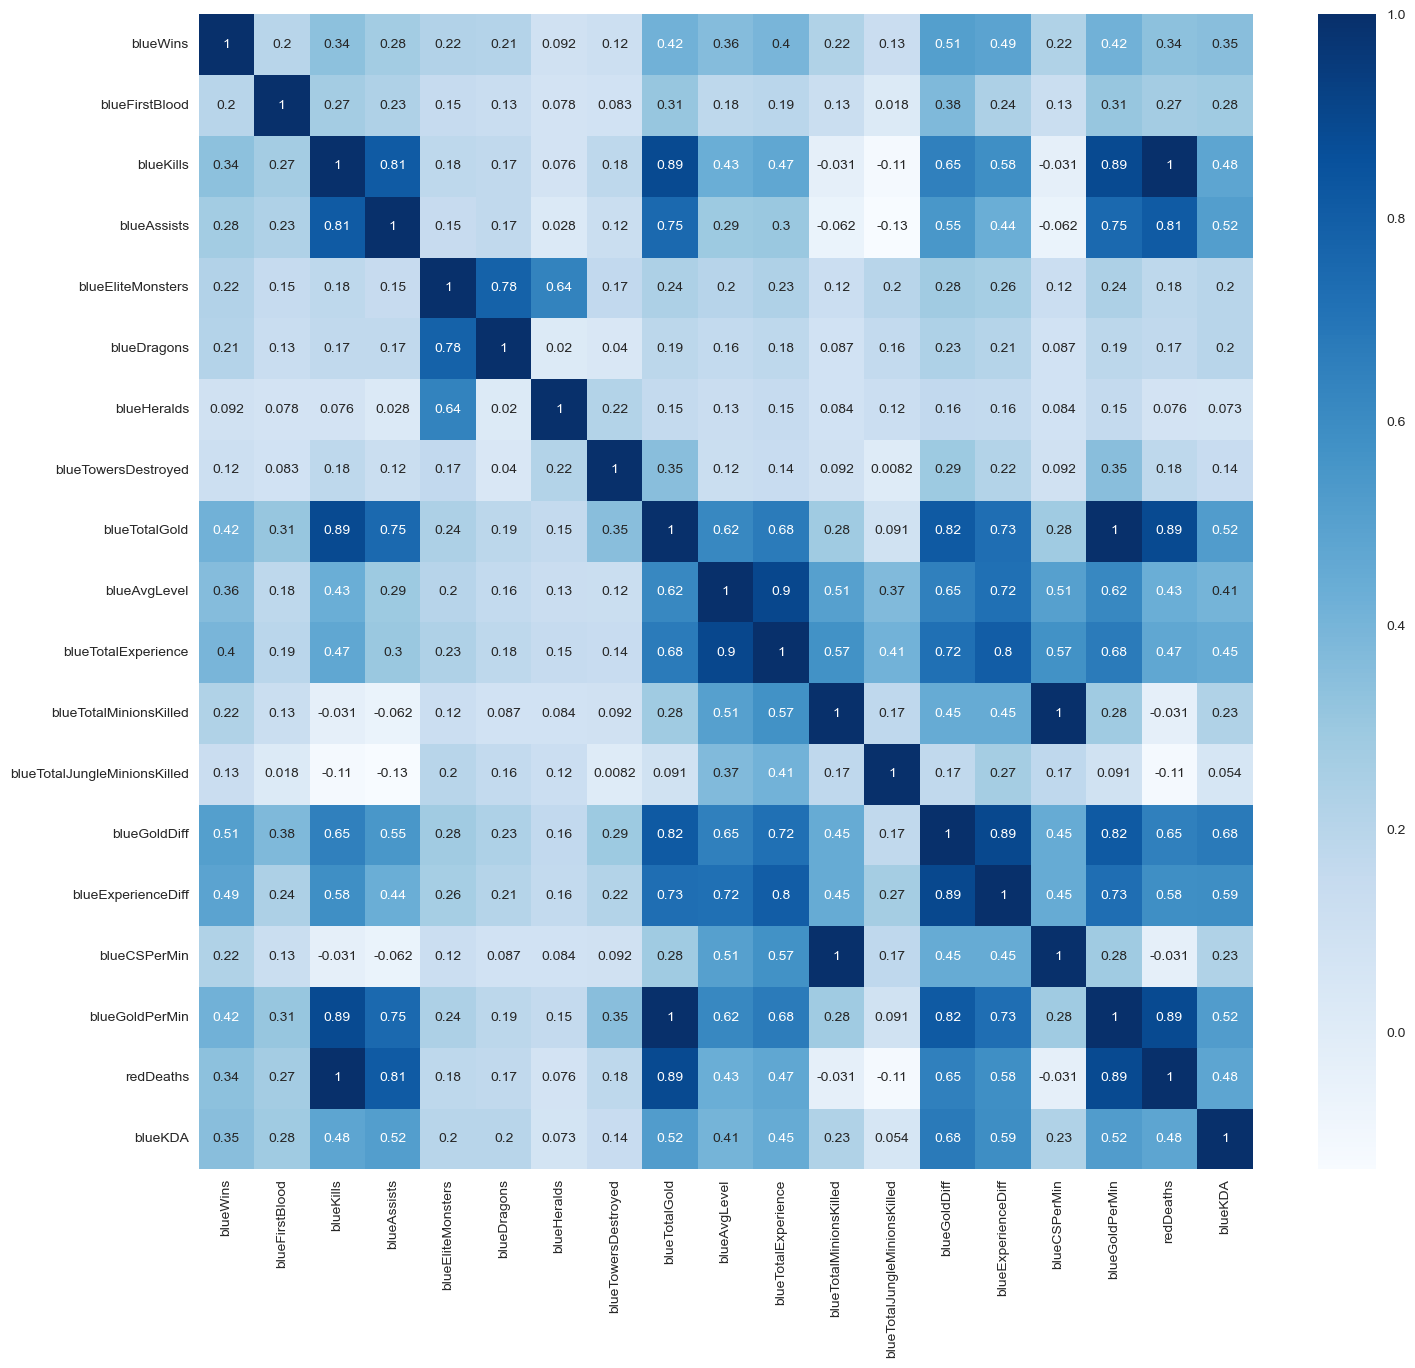

In [234]:
#configuracoes
vars_ladoazul = df.corr()[df.corr()['blueWins'] >= 0.07].index.values

#Construindo o gráfico de mapa de correlação
plt.subplots(figsize=(17,15))
plt.pcolor(df[vars_ladoazul].corr())
plt.xticks(np.arange(0, len(vars_ladoazul), 1), vars_ladoazul)
plt.yticks(np.arange(0, len(vars_ladoazul), 1), vars_ladoazul)
plt.xticks(rotation=90)

#Plotando o gráfico
sns.heatmap(df[vars_ladoazul].corr(),cmap="Blues",annot=True)
plt.show()

O mapa de calor impresso acima contém valores correlatos que pertencem a nossa variável targe blueWins.

Os retângulos mais escuros indicam alta correlação positiva (mais próxima de 1, enquanto os retângulos mais claros indicam alta correlação negativa (mais próxima de -1).

E podemos observar que na diagonal, os quadrados representam a correlação de uma variável com ela mesma, por isso possui uma forte correlação positiva. 

Olhando para a matrix, existem variáveis com um valor de correlação positiva igual ou maior do 0.4 com a variável blueWins, sendo:
- blueTotalGold; 
- blueTotalExperience;
- blueGoldDiff; 
- blueExperienceDiff
- bluGoldPerMin

Para essas variáveis, irá se o gráfico de distribuição (estimativa de densidade do kernel + histograma) para nos ajudar a vizualizar a importância significativa de cada uma delas para a vitória do lado azul.

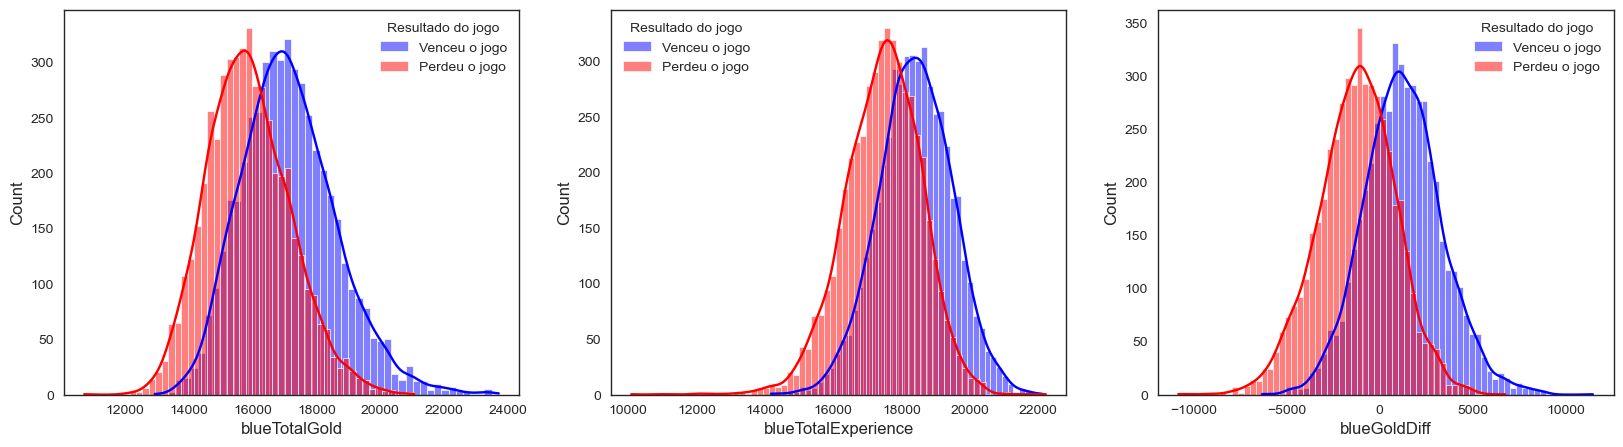

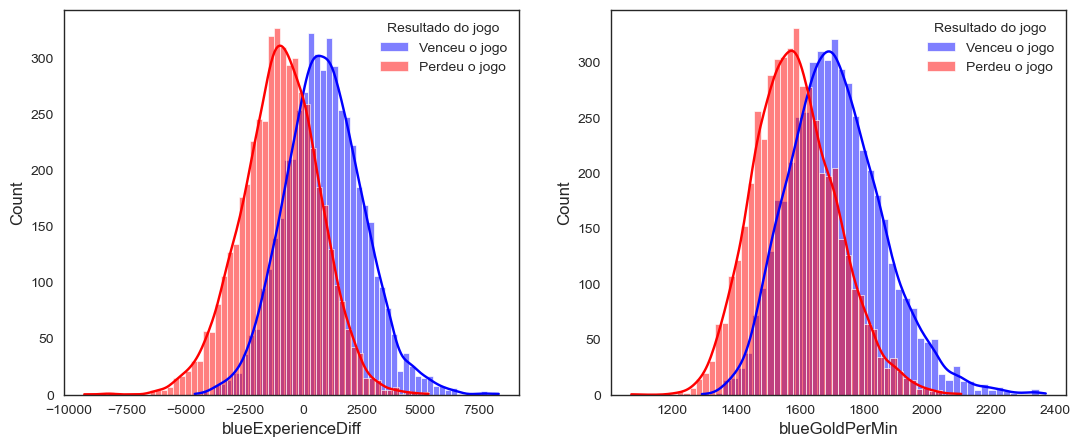

In [293]:
#Variáveis que serão utilizadas
corr_blue = ['blueTotalGold', 'blueTotalExperience', 'blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin']


df_win  = df[df["blueWins"]==1]     #Variável alvo para resultado de vitória do lado azul 
df_lose = df[df["blueWins"]==0]     #Variável alvo para resultado de derrota do lado azul

#Configurações e plotando o gráfico
c = 0
plt.subplots(figsize=(20,5))
for i in corr_blue:
    plt.subplot(1,3,c+1)
    sns.histplot(df_win[i],label='Venceu o jogo',color='blue', kde=True)
    sns.histplot(df_lose[i],label='Perdeu o jogo',color='red', kde=True)
    plt.legend(title='Resultado do jogo')
    c=c+1

    if c == 3:
        plt.show()
        if i != corr_blue[len(corr_blue) - 1]:
            plt.subplots(figsize=(20,5))
        c=0


# Modelagem e Avaliação de Modelos
Agora, de fato vamos focar nas variáveis (atributos) apenas do lado azul. Utilizando o conjunto de dados do lado azul, que foi definidido no início do projeto. Mas, antes de construirmos um modelo de Machine Learning, iremos abordar duas etapas importantes antes da construção de um modelo, que é aplicar algumas técnicas de seleção de variáveis importantes e reduzir a dimensionalidade do nosso conjunto de dados.

# Seleção de Variáveis e Redução de Dimensionalidade
A seleção de variáveis e a redução de dimensionalidade são dois assuntos bastante relacionados e por esse motivo podem ser frequentemente confundidos.

Por outro lado, a seleção de variáveis é a tarefa de reduzir o número de variáveis originais, removendo aquelas que acrescentam pouco ou nenhum valor para a predição do modelo de machine learning.

A redução de dimensionalidade pode ser definida como a tarefa de reduzir a dimensão de um conjunto de dados através de transformações das variáveis originais.

De modo geral, enquanto na seleção de variáveis o nosso objetivo é filtraar e descartar as variáveis pouco relevantes e mantermos apenas um subconjunto das variáveis originais relevante, na redução de dimensionalidade trazemos os dados para um espaço de menor dimensionalidade criando novas variáveis.

# Redução de dimensionalidade com PCA
A dimensionalidade de um data set é o número de variáveis neste data set, geralmente ignorando a variável alvo. Por exemplo, o data set Iris possui quatro variáveis explicativas (suas quatro dimensões) e uma variável alvo (a espécie da planta). Porém, nem sempre vai ser assim, principalmente nos casos reais, e outros conjuntos de dados podem possuir até dezenas de milhares de variáveis. Um exemplo bom são os conjunto de dados de imagens, onde cada pixel é representado por uma variável (e seu valor é sua cor em RGB ou escala de cinza, por exemplo). A partir de algumas dezenas de variáveis, normalmente passamos a considerar o conjunto de dados como de alta dimensionalidade.

É de se imaginar que muitas das informações contidas nas variáveis dos conjuntos de dados de altas dimensões, são redundantes. Por exemplo, no caso de fotos, é fácil perceber que os pixels das bordas das fotos pouco variam (normalmente sendo brancos) e que pixels adjacentes variam muito pouco entre si. Então, por que não "compactar" essa informação em um número menor de variáveis.

Além de remover a redundância, podemos estar interessados em diminuir a dimensionalidade para tornar certos problemas tratáveis. Alguns algoritmos não lidam bem com dados em altas dimensões, e isso tem a ver com a maldição da dimensionalidade (do Inglês, curse of dimensionality), que acontece pelo motivo de nós só conseguimos enxergar até três dimensões. Por exemplo, se precisamos visualizar um conjunto de dados cuja dimensão é superior a três, então temos que plotar as variáveis dois a dois (ou três a três) e acabamos perdendo informação nesse processo, pois não conseguimos visualizar todas variáveis ao mesmo tempo.

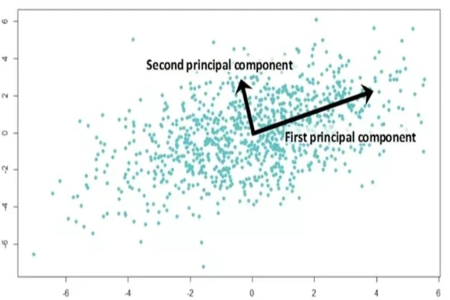

In [328]:
ur10 = "https://user-images.githubusercontent.com/110730862/227380041-ecde4cdd-6dc4-48f4-af8b-4329010857a4.png"
response10 = requests.get(ur10)
imagem10 = Image.open(BytesIO(response10.content))
nova_imagem10 = imagem10.resize((450, 300))
display(nova_imagem10)

PCA (Principal Component Analysis) é uma técnica estatística para redução de dimensionalidade. A ideia é criar variáveis (componentes) que capturem o máximo de variância (i.e., informação) dos dados originais. Com esses componentes podemos criar visualizações 2D ou 3D, procurar por agrupamentos e alimentar algoritmos.

Se tivermos um conjunto de dados originais com *p*
 dimensões, ou seja, 
 variáveis, podemos procurar por 
 componentes principais (com d &lt; p
). Denotemos as variáveis por $X_{1}$, $X_{2}$,..., $X_{p}$, então podemos escrever o primeiro componente principal através da combinação linear:
$$Z_{1}=\phi_{11}X_{1}+\phi_{21}X_{2}+...+\phi_{p1}X_{p}= \sum_{1 \le j \le p}\phi_{j1}X_{j}$$  
$$Z_{1}=1.2 \begin{bmatrix} 1 \\ 2 \end{bmatrix} + 3.4 \begin{bmatrix} 0 \\
3 \end{bmatrix} = \begin{bmatrix} 1.2 \\ 12.6 \end{bmatrix}
  $$

Agora vem aquela parte um pouco confusa, mas a explicação matemática e o entendimento de como essa redução da dimensionalidade com PCA acontece é de extrema importância. Então vamos lá:

Os valores $\phi_{ij}$ são chamados de loadings do PCA, e juntos formam o vetor de loadings $\vec \phi_{1}=[\phi_{11},\phi_{21},...,\phi_{p1}]^T$

O segundo índice do subscrito indica de qual componente estamos falando. Neste caso, 1 indica que é do primeiro componente.

Note que $Z_{1}$ é um vetor, i.e., $Z_{1}=[Z_{11}, Z_{21},...,Z_{p1}]^T$, onde $Z_{11}=\phi_{11}x_{i1}+\phi_{21}x_{i2}+...+\phi_{p1}x_{ip}= \sum\limits_{1\le j\le p}\phi_{j1}X_{ij}$

A questão é, como determinamos $\vec \phi_{1}$?

Vamos assumir que $X_{1}$, $X_{2}$,...
foram centralizados para ter média zero, mas mantidas suas variâncias. Então podemos tentar maximizar a variância de  $Z_{1}$ 
 com a restrição de que os loadings são limitados a um circulo unitário. Em outras palavras:

$\max_{\phi_{11},\phi_{21},...,\phi_{p1}}= \left[\{Var[Z_{1}]=\mathbb{E}[[Z_{1}]^2- \underbrace{\mathbb{E}[Z_{1}]^2}_{0}=\frac{1}{n} \sum\limits_{1\le i \le n}Z_{i1}^2=\frac{1}{n} \sum\limits_{1\le i \le n} \left(\sum\limits_{1\le i \le p}\phi_{ji}x_{ij}^2\right)\right]$ restrito a $\sum\limits_{1 \le i \le p}\phi_{ji}^2=1$

O segundo componente principal,$Z_{2}$ 
, segue exatamente o mesmo raciocínio do primeiro componente, exceto que ele deve ser não correlacionado com $Z_{1}$ 
, o que significa que $\vec \phi_{2}$
 deve ser ortogonal a $\vec \phi_{1}$ 
.

Todos os demais componentes principais, que podem ser no máximo *p*, seguem esse raciocínio, sempre não correlacionados (ortogonais) a todos componentes principais anteriores.

Ao fim desse processo, teremos vários componentes principais, sendo que o primeiro captura a maior fração da variância total dos dados, o segundo captura a segunda maior fração da variância total e assim por diante. A soma das frações da variância capturadas por todos *p*
 componentes principais deve ser portanto igual a 1.

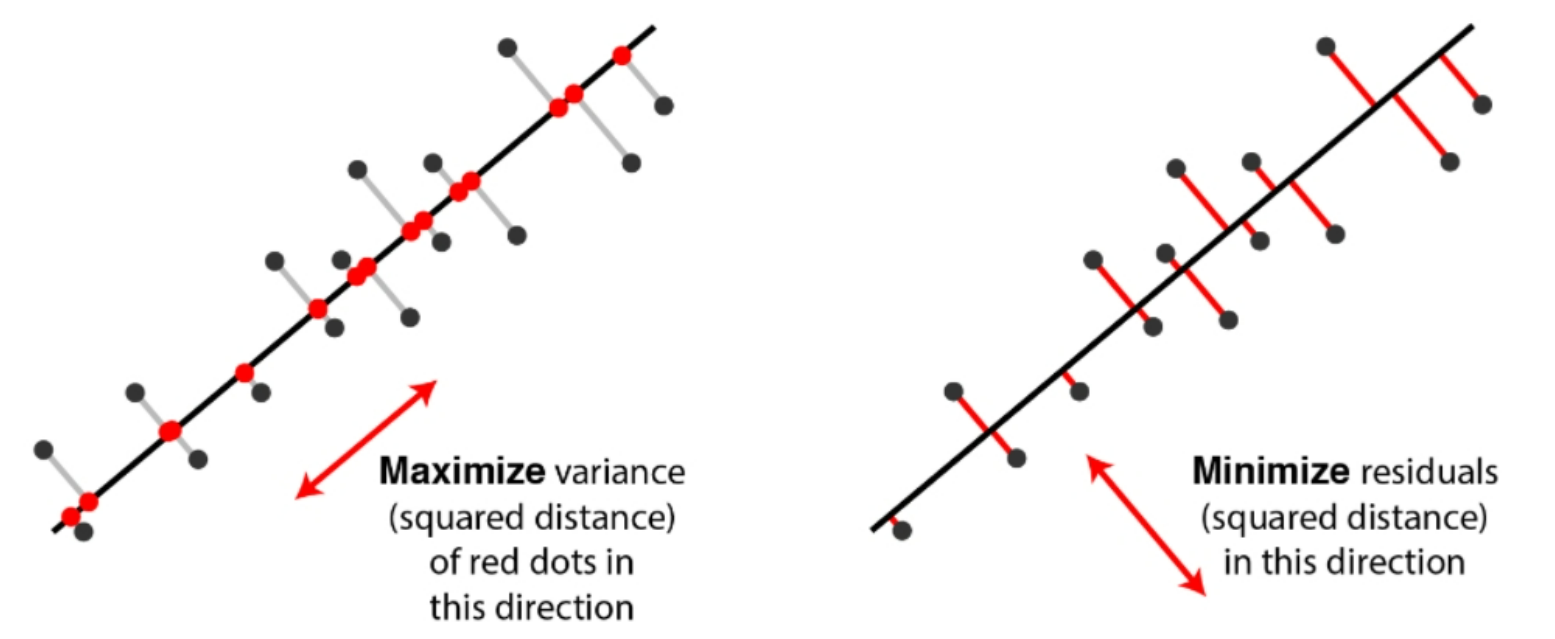

Mas a primeira pergunta que pode surgir para você que está vendo isso pela primeira vez é "quantos componentes principais precisamos?". Diante mão, aviso que não precisa se preocupar com isso, porém vai depender.

Se o nosso intuito for apenas visualização, podemos pegar só os dois ou três primeiros componentes principais. Se, por outro lado, estivermos interessados em algo diferente, como alimentar um algoritmo ou buscar um padrão de cluster, podemos pegar tantos componentes principais quantos forem necessários para explicar uma boa parte da variância total. Geralmente se fala de 95% da variância total ou algo perto disso.

In [236]:
#Criando um novo conjunto de dados para trabalharmos
dados = lado_azul

#Importando a biblioteca de pré-processamento do sckit-learn]
from sklearn import preprocessing 

#O PCA é afetado pela escala, por isso iremos dimensionar o conjunto de dados primeiro, padronizando
dados = preprocessing.StandardScaler().fit_transform(dados)   #Padronizando as variáveis

Após padronizarmos as variáveis, removendo a média e escala a variância a uma unidade. Isso significa que para cada variável, a média seria 0, e o Desvio Padrão seria 1. Desta forma, as variáveis são padronizadas, tornando-as mais manejáveis para nossos modelos. Vamos de fato utilzar o PCA para reduzir a dimensionalidade.

In [237]:
#PCA
from sklearn.decomposition import PCA

# Aplicando o PCA no nosso conjunto de dados, mas sem reduzir a dimensionalidade:
pca = PCA().fit(dados)

# Fração da variância:
evr = pca.explained_variance_ratio_
print(evr.max())

0.35896304849159555


Agora sabemos qual é a nossa fração da variância.

In [238]:
#Reduzindo a dimensionalidade
pca = PCA(n_components=2)
pcamodel = pca.fit_transform(dados)

#Tamanho do conjunto de dados antes e depois
print(f"Original shape: {lado_azul.shape}, projected shape: {pcamodel.shape}")
print(pca.explained_variance_ratio_) # Para saber a variância explicada

Original shape: (9879, 20), projected shape: (9879, 2)
[0.35896305 0.13222428]


Então agora podemos responder a perguta de quantos componentes principais precisamos para explicar 95% da variância total?

In [239]:
#Realizando o cálculo de quantos componentes precisariamos
cumulative_variance_ratio = np.cumsum(evr)
numero_componentes = np.argmax(cumulative_variance_ratio >= 0.95) + 1 # Contagem começa em zero.

numero_componentes

11

Dessa forma podemos achar o número de componentes necessários para explicar determinada fração da variância total. Mas o PCA do sklearn também nos permite achar diretamente as componentes principais justamente necessárias para essa fração da variância total. Para isso, basta especificar a fração da variância total que se quer acumular no parâmetro n_components em vez do número de componentes. Lembrando que quado queremos alimentar um algoritmo ou buscar um padrão de cluster, normalmente se fala de 95% da variância total ou algo perto disso.

In [240]:
#Verificando o número de componentes pelo próprio PCA
pca_095 = PCA(n_components=0.95)
X_reduzido = pca_095.fit_transform(dados)

X_reduzido.shape # Segundo elemento da tupla é o número de componentes encontrados

(9879, 11)

Veja o gráfico que mostra o número de componentes.

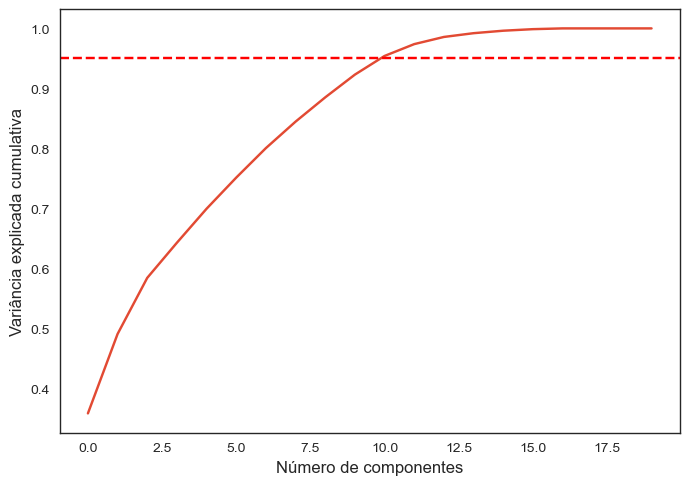

In [241]:
#Construindo o gráfico para o número de componentes
g = sns.lineplot(np.cumsum(evr))
g.axes.axhline(0.95, ls="--", color="red")
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada cumulativa');

# Seleção de variáveis
O segundo tópico desta etapa é a seleção de variáveis: e como podemos diminuir o número de variáveis do nosso conjunto de dados, mantendo somente aquelas que são relevantes para a predição do nosso modelo?

A primeira técnica que iremos realizar é a chamada RFE com o Random Forest Classifier para selecionar cinco variáveis relevantes, eliminando uma a uma.

O Recursive Feature Elimination (RFE) é uma técnica para seleção de variáveis e basicamente ele remove recursivamente as variáveis e constrói o modelo com as variáveis remanescentes. Essa técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo.

Antes de aplicarmos essa técnica, vamos visualizar graficamente quais os atributos mais importantes. Para isso, a lib Yellowbrick possui o atributo FeatureImportances para classificar e plotar as variáveis relativas.

Random Forest Classifier é considerado um dos modelos mais imparciais. À medida que cria várias árvores de decisão, levando em consideração os recursos aleatórios de cada árvore de decisão.

Por causa dessa aleatoriedade, o Random Forest Classifier considerou estar dando a importância as variáveis de forma imparcial.

In [242]:
#importando os pacotes
from yellowbrick.features import FeatureImportances
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier;

In [243]:
#RFE com Random Forest Classifier para selecionar 5 variáveis relevantes
rfc_r = RandomForestClassifier(random_state=0)
rfe = RFE(rfc_r, n_features_to_select= 5)

#Vamos definir as variáveis de entrada e saída
X_rfc = lado_azul.drop(["Wins"],1)
Y_rfc = lado_azul["Wins"]

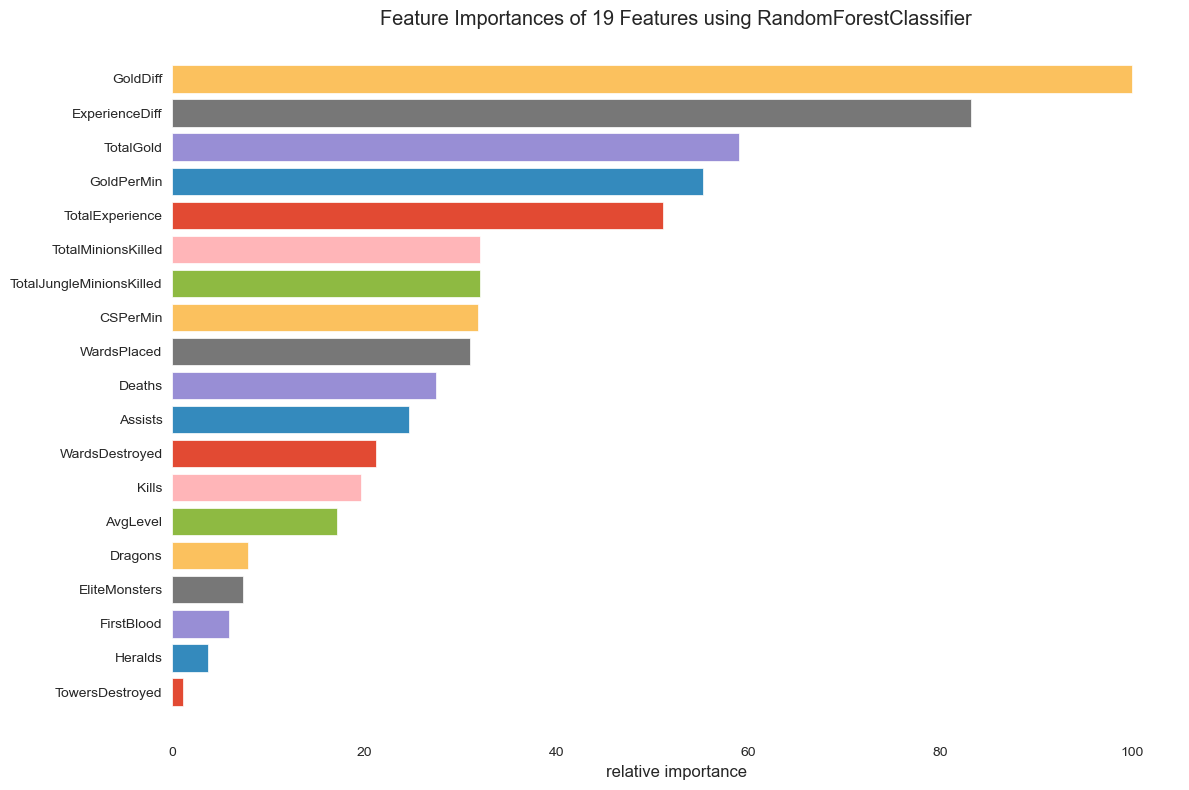

In [244]:
# Gráfico :
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

#Realizando configuração para o gráfico:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Plotando o gráfico:
viz = FeatureImportances(RandomForestClassifier(random_state=0), ax=ax)
viz.fit(X_rfc, Y_rfc)
viz.poof();

In [245]:
#Fit nos dados
rfe.fit(X_rfc, Y_rfc)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    importance_getter='auto', n_features_to_select=5, step=1, verbose=0)

Após treinar O RFE com as variáveis de entrada que definimos anteriormente, podemos verificar quais são as cinco variáveis mais relevantes.

In [246]:
#Vendo quais variaveis foram selecionadas
rfe.support_ 
pd.DataFrame({'coluna': X_rfc.columns,
              'bool': rfe.get_support()}).sort_values(by='bool',ascending=False).head(6).reset_index(drop=True)

coluna   bool
0       GoldPerMin   True
1        TotalGold   True
2   ExperienceDiff   True
3         GoldDiff   True
4  TotalExperience   True
5         CSPerMin  False

# Seleção de Variáveis Numéricas usando Backward Elimination
Backward Elimination é uma técnica de seleção de recursos durante a construção de um modelo de aprendizado de máquina. Sendo usada para remover os recursos que não têm um efeito significativo na variável dependente ou na previsão de saída. Mas, neste caso estamos focados em identificar as variáveis numéricas que são relevantes.

Primeiro, precisamos dividir nossas variáveis em numéricas e categóricas.

In [247]:
#Dividindo as variáveis em variáveis numéricas e categóricas
categorical=[]
numerical=[]
for col in list(lado_azul):
    if(len(lado_azul[col].unique())<=30):
        categorical.append(col)
    else:
        numerical.append(col)

In [248]:
#Printando o resultado das listas criadas
print("Número de variáveis categóricas:",len(categorical))
print("Número de variáveis númericas:",len(numerical))

Número de variáveis categóricas: 11
Número de variáveis númericas: 9


Antes de aplicarmos a seleção de variaveis númericas, vamos utilizar o label encoder para normalizar os nossos dados. O label encoder é um transformador e deve ser usado para codificar os valores alvo, ou seja nosso Y, e não as variáveis de entrada X. E é isso que iremos fazer.

In [249]:
#Importando o Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [250]:
lado_azul["Wins"]

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: Wins, Length: 9879, dtype: int64

In [251]:
#Definindo as variáveis de entrada e saída da técnica Backward Elimination que será realizada
X_be = lado_azul[numerical]
Y_be = le.fit_transform(lado_azul["Wins"])

In [252]:
#Aplicando a técnica para as variáveis
cols = list(X_be.columns)
pmax = 1
while (pmax>0.05):
    p=[]
    X_1 = X_be[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y_be,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        breakselected_features_BE = cols
print("Best features using Backward Elimination: ",cols)

Best features using Backward Elimination:  ['TotalJungleMinionsKilled', 'GoldDiff', 'ExperienceDiff']


Então, estes são nossas três variáveis númericas mais relevantes.

Após isso, poderiamos realizar o que é chamado de engenharia de recursos ou feature engineering, etapa aplicada em projetos de Machine Learning, onde é fornecido ao modelo de machine learning novos recursos que representem melhor o problema, com esse novos recursos, possivelmente, o modelo irá obter um melhor desempenho. A engenharia de recursos pode ser definida como o processo de transformar dados brutos em recursos que representem melhor o problema subjacente aos modelos de machine learning.

No mundo real, os dados dificilmente estarão prontos para serem consumidos e servirem como dados de entrada para os modelos. Por isso, na maioria dos casos grande parte do tempo de um projeto de machine learning pode ser gasto com a engenharia de recursos.

Por esse motivo, isso não se aplica tanto ao nosso conjunto de dados.

Algo que poderiamos fazer para finalizar, é incluir no conjunto de dados do lado azul que estamos trabalhando o atributo de KDA, como fizemos anteriormente.

In [253]:
#Incluindo uma nova coluna no conjunto de dados do lado azul
lado_azul['KDA'] = ((lado_azul["Kills"] + lado_azul["Assists"]) / lado_azul["Deaths"])
lado_azul

Wins  WardsPlaced  WardsDestroyed  FirstBlood  Kills  Deaths  Assists  \
0        0           28               2           1      9       6       11   
1        0           12               1           0      5       5        5   
2        0           15               0           0      7      11        4   
3        0           43               1           0      4       5        5   
4        0           75               4           0      6       6        6   
...    ...          ...             ...         ...    ...     ...      ...   
9874     1           17               2           1      7       4        5   
9875     1           54               0           0      6       4        8   
9876     0           23               1           0      6       7        5   
9877     0           14               4           1      2       3        3   
9878     1           18               0           1      6       6        5   

      EliteMonsters  Dragons  Heralds  ...  TotalGold  AvgLevel  \
0                 0        0        0  ...      17210       6.6   
1                 0        0        0  ...      14712       6.6   
2                 1        1        0  ...      16113       6.4   
3                 1        0        1  ...      15157       7.0   
4                 0        0        0  ...      16400       7.0   
...             ...      ...      ...  ...        ...       ...   
9874              1        1        0  ...      17765       7.2   
9875              1        1        0  ...      16238       7.2   
9876              0        0        0  ...      15903       7.0   
9877              1        1        0  ...      14459       6.6   
9878              0        0        0  ...      16266       7.0   

      TotalExperience  TotalMinionsKilled  TotalJungleMinionsKilled  GoldDiff  \
0               17039                 195                        36       643   
1               16265                 174                        43     -2908   
2               16221                 186                        46     -1172   
3               17954                 201                        55     -1321   
4               18543                 210                        57     -1004   
...               ...                 ...                       ...       ...   
9874            18967                 211                        69      2519   
9875            19255                 233                        48       782   
9876            18032                 210                        45     -2416   
9877            17229                 224                        48      -839   
9878            17321                 207                        44       927   

      ExperienceDiff  CSPerMin  GoldPerMin       KDA  
0                 -8      19.5      1721.0  3.333333  
1              -1173      17.4      1471.2  2.000000  
2              -1033      18.6      1611.3  1.000000  
3                 -7      20.1      1515.7  1.800000  
4                230      21.0      1640.0  2.000000  
...              ...       ...         ...       ...  
9874            2469      21.1      1776.5  3.000000  
9875             888      23.3      1623.8  3.500000  
9876           -1877      21.0      1590.3  1.571429  
9877           -1085      22.4      1445.9  1.666667  
9878             -58      20.7      1626.6  1.833333  

[9879 rows x 21 columns]

# Modelagem e Avaliação
Agora começaremos a parte de Machine Learning de fato, e o primeiro passo é definir o algoritmo que será utilizado na construção do nosso modelo, ou seja, qual o que se aplica melhor ao nosso problema.

A escolha de um bom algoritmo vai depender de diversos fatores como entendimento do problema, o conjunto dos dados e entre outros... Porém, a principio o que deve está claro é que como foi falado no início do projeto, estamos lhe dando com um problema de classificação, dessa forma, já temos um primeiro caminho a seguir. Mas para esse projeto, será realizado a construção de um modelo de forma manual, como também o AutoML com Pycaret, sendo uma maneira mais fácil de se chegar na escolha de um bom algoritmo, com um bom desempenho.

# Construindo um modelo com XGBClassifier
O algoritmo XGBClassifier é um clássico de ‘boosting’ de gradiente.

O XGBoost possui um poder preditivo imensamente alto que o torna a melhor escolha para precisão em eventos, pois possui tanto o modelo linear quanto o algoritmo de aprendizado de árvores, tornando o algoritmo quase 10x mais rápido do que as técnicas existentes de ‘boosting’ de gradiente.

O algoritmo é uma otima opção para quando as coisas não saem como queriamos na modelagem preditiva. Devido que é um algoritmo altamente sofisticado e poderoso o suficiente para lidar com todos os tipos de irregularidades de dados.

Uma das coisas mais interessantes sobre o XGBoost é que ele também é chamado de técnica de reforço regularizado. Isso ajuda a reduzir a modelagem de overfit.

Construir um modelo usando o XGBoost é fácil. A dificuldade começa ao tentar melhorar o modelo usando o XGBoost, não iremos focar nisso, mas saiba que o algoritmo usa vários parâmetros vantajosos e para melhorar o modelo, o ajuste dos parâmetros é obrigatório.

In [254]:
#Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

Após importar as bibliotecas necessárias, podemos construir o nosso modelo com XGBClassifier.

Porém, primeiro precisamos dividir nosso conjunto de dados em dados de treino e teste, e para isso iremos utilizar nossas variáveis de entrada X e a variável de saída Y definidas na técnica RFE que aplicamos.

In [255]:
#Divindo os dados em treino em teste, com proporção 70:30 respectivamente
X_train, X_test, y_train, y_test = train_test_split(X_rfc, Y_rfc, test_size=0.3, random_state=1)

Para dividir os dados em treino e teste, utilizamos a função train_test_split do sklearn e passamos o parâmetro text_size para utilizar uma divisão de 70% para treino e 30% para teste. Essa proporção de divisão vai depender do tamanho do conjunto de dados, normalmente em projetos de machine learning é comum ser utilizada essa divisão, porém, em casos reais que são trabalhados com conjunto de dados maiores, a proporção da divisão dos conjuntos de dados acaba sendo diferente e pode ter até uma outra categoria, como desenvolvimento, e o conjunto de dados ser dividido em conjunto de treino, desenvolvimento e teste, com um número maior de dados para o conjunto de treino e um número bem pequeno para o conjunto de desenvolvimento e teste.

In [256]:
#Construindo e treinando o modelo
model_xgb = XGBClassifier();

#Realizando o treinanmento
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

Por último, realizaremos as previsões e a classificação das métricas do desempenho do modelo, com a função classification_report. Mais na frente, quando realizarmos o AutoML com Pycaret iremos falar sobre as métricas de classificação, então você pode dar uma conferida para entender melhor o resultado das métricas do modelo.

In [257]:
#Realizando a predição e avaliação do modelo construido 
pred = model_xgb.predict(X_test)
print("Test Accuracy: {}%".format(round(model_xgb.score(X_test, y_test)*100, 2)))
print(classification_report(y_test, pred))

Test Accuracy: 70.75%
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1469
           1       0.71      0.70      0.71      1495

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964



Para finalizar, quais foram as variáveis que o modelo considerou mais importante?

<BarContainer object of 19 artists>

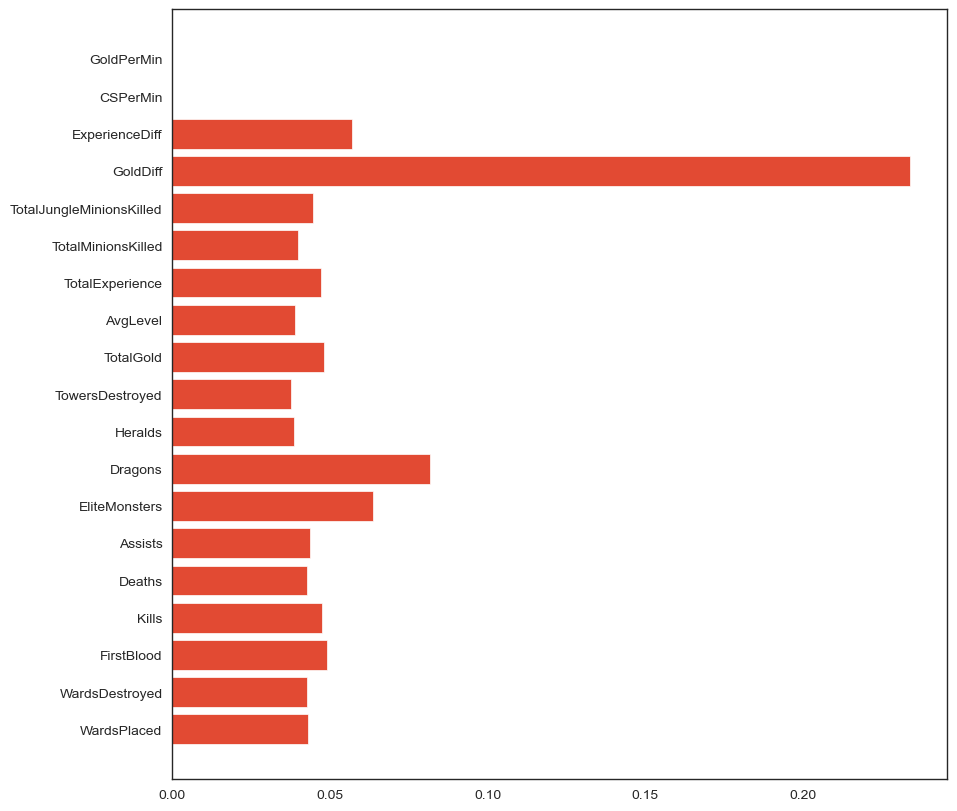

In [258]:
#Construindo um gráfico para as variáveis consideradas relevantes pelo modelo
fig = plt.figure(figsize=(10, 10))
plt.barh(X_rfc.columns, model_xgb.feature_importances_)

Finalizaremos esse modelo por aqui, o recomendado seria tentar melhorar o seu desempenho, porém ainda veremos o AutoML com Pycaret, então não será necessário focarmos tanto nesse modelo para este projeto.

# AutoML com Pycaret
Nos dias atuais, a busca está cada vez mais alta por algo um pouco mais automatizado e que economize tempo, e esse é o principal objetivo do AutoML.

E como solução para realizar a automatização e economização de tempo na construção de modelos de Machine Learning, temos a biblioteca Pycaret, que busca abordar AutoML. O objetivo do AutoML é passar desde o nosso início do projeto com o conjunto de dados puro, até o modelo de aprendizado de máquina com melhor desempenho.

A biblioteca PyCaret segue o mesmo caminho dos objetivos do AutoML, sendo uma que permite ir desde a preparação de seus dados até a implantação do modelo em segundos. Com a biblioteca, em vez de tirarmos conclusões para se chegar no algoritmo ideal que deverá ser utilizado e testar diferentes algoritmos na construção do modelo, como o primeiro modelo que fizemos anteriormente. Podemos realizar o treinamento e teste para diferentes tipos de modelos de classificação, ao mesmo tempo.

Além disso, o PyCaret é considerado melhor e mais amigável do que o Scikit-Learn. Ambos são ótimos quando se fala de Machine Learning, mas o PyCaret vai economizar muito tempo que você gastaria na seleção do modelo e no ajuste fino.

Essa é a parte mais divertida do projeto. Então vamos dar os primeiros passos importando a biblioteca.

In [259]:
#importando a biblioteca do Pycaret
from pycaret.classification import *

A primeira coisa a se fazer após importarmos a biblioteca é iniciala, para que a mesma possa fazer todo o seu trabalho de pré-processamento dos dados de uma forma muito rápida.

Por o conjunto de dados ter muitas variáveis tanto numéricas como categóricas, iremos utilizar parâmetros, para separar as variáveis categóricas e ignorar algumas variávies que não são tão relevantes, utilizando o resultado das variáveis relevantes de acordo com a técnica Backward Elimination que aplicamos anteriormente. Dessa forma, o Pycaret irá desempenhar melhor e não obter erros.

In [260]:
# Pré-processamento, tornando valores infinitos da variável KDA em média para que o pycaret rode
mean_KDA = lado_azul['KDA'][np.isfinite(lado_azul['KDA'])].mean()
lado_azul['KDA'] = lado_azul['KDA'].replace([np.inf, -np.inf], np.nan).fillna(mean_KDA)

#Inicializando o pré-processamento do Pycaret
models = setup(data=lado_azul,
             categorical_features=categorical.remove('Wins'),
             ignore_features=list(set(numerical)-set(cols)),
             target='Wins',
             session_id=33)

Esse resultado em formato de tabela mostra várias informações sobre o pré-processamente que foi aplicado nos dados e é bom observar cuidadosamente. Após isso, podemos passar para a parte mais fácil e mais "bonita", onde compararemos o desempenho de vários modelos de aprendizado de máquina e veremos qual deles tem o melhor desempenho, de modo rápido e prático.

In [261]:
#Comparação dos modelos e seus desempenhos
compare_models ()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

Realmente é impresionante, o tempo que a a função compare_models () leva para realizar todo este trabalho de comparação do desempenho de diferentes modelos. Se observarmos, a Análise Discriminante Linear parece ter o melhor desempenho em termos de precisão, melhor até do que o modelo XGBClassifier que construimos, entretanto, vale lembrar que alta acurácia não significa bom modelo, é preciso que seja feita uma avaliação.

Mas, antes de partimos para os próximos passos, vamos entender mais sobre o algoritmo de Análise Discriminante Linear, assim como fizemos com XGBClassifier, o que trata-se de um algoritmo de classificação.

# Análise Discriminante Linear (LDA)

A Análise Linear Discriminante é frequentemente usada em problemas de classificação, onde o objetivo é atribuir uma observação a uma das várias classes conhecidas com base em suas características. A LDA funciona selecionando um subespaço das variáveis originais que melhor discrimina as classes.

Em problemas de classificação binária, a LDA determina a linha ou hiperplano que melhor separa as duas classes. Em problemas de classificação multiclasse, a LDA pode ser usada para projetar os dados em um espaço de menor dimensão que possa ser separado em subespaços que correspondam a cada uma das classes.

A LDA é particularmente útil quando os dados possuem muitos recursos (ou variáveis) e as classes são razoavelmente bem definidas. Nesses casos, a LDA pode ajudar a reduzir a dimensionalidade dos dados e a melhorar a precisão da classificação, ao mesmo tempo em que reduz o risco de overfitting (sobreajuste) do modelo.

Em resumo, a Análise Linear Discriminante é uma técnica poderosa e amplamente utilizada em problemas de classificação, especialmente em casos em que o número de recursos é grande e as classes são bem definidas. Com sua capacidade de selecionar as características mais discriminantes, a LDA pode ajudar a melhorar a precisão da classificação e reduzir a dimensionalidade dos dados, tornando-a uma técnica valiosa em muitas aplicações de aprendizado de máquina.

Assim, pode-se será utilizado esse algoritmo logo abaixo.

In [262]:
# Criando o modelo Análise Discriminante Linear 
model_lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Agora podemos realizar o ajuste de hiperparâmetro adicional por meio da função tune_model (), e isso pode ou não melhorar o desempenho do nosso modelo. De modo geral, podemos tentar "tunar" o nosso modelo. Os hiperparâmetros podem ser definidos como parâmetros ajustáveis e que permitem controlar o processo de treinamento do modelo.

In [263]:
 tuned_LDA = tune_model(model_lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Através do resultado das métricas, podemos observar que o desempenho do modelo teve um aumento positvo para cada métrica, com exceção da de precisão, e por isso é importante entendermos um pouco sobre essas métricas de avaliação do modelo. Neste caso, métricas que são responsáveis por avaliar modelos de classificação. 

# Avaliação do Modelo e Métricas de avaliação de um Classificador
Estas métricas são utilizadas em tarefas de classificação, e a maioria delas pode ser adaptada tanto para classificação binária quanto de múltiplas classes. Lembrando, que estamos trabalhando com classificação binária.

Cada diferente tipo de acerto e erro de um classificador recebe um nome e podemos derivar algumas métricas de avaliação de um classficador a partir deles. Por exemplo, para um classificador binário que é o nosso (isso também pode ser estendido a um classificador multiclasse), podemos construir uma matriz de confusão, que sumariza os acertos e erros de um classificador. Veja:

# Matriz de Confusão
A matriz de confusão pode ser definida como uma representação no formato de tabela para os acertos e erros de um classificador. Nela, é sumarizada as quantidades de pontos que foram corretamente classificados e os que também não foram.

- A definição que veremos abaixo da matriz de confusão é uma dentre as possíves que podem ser feitas. Alguns autores utilizam a definição "transposta". Porém, isso não faz muita diferença.

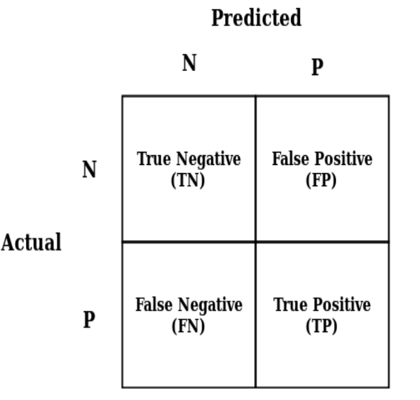

In [320]:
# Importando a imagem que explica matrix de correlaçao
ur4 = "https://user-images.githubusercontent.com/110730862/227378070-f8cd9eea-fe0a-4639-9b69-cef128f5898a.png"
response4 = requests.get(ur4)
imagem4 = Image.open(BytesIO(response4.content))
nova_imagem4 = imagem4.resize((420, 400))
display(nova_imagem4)

Se observarmos, neste caso a matriz de confusão possui duas linhas e duas colunas. As linhas são relativas aos valores verdadeiros, aqueles anotados no conjunto de dados, e as colunas são relativas aos valores previstos pelo modelo.

O modelo pode cometer dois tipos de erros, similar aos testes de hipóteses da estatística:

O primeiro tipo de erro é o falso positivo (*FP*): dizer que o dado pertence à classe positiva, quando na verdade pertence à classe negativa. Isso seria um Erro Tipo I.

O segundo tipo de erro é o falso negativo (*FN*): dizer que o dado pertence à classe negativa, quando na verdade pertence à classe positiva. Isso seria um Erro Tipo II.

Observando a matriz de confusão, fica claro que desejamos minimizar *FP* e *FN* e maximizar *TP* e *TN* 
. Em muitos casos, isso não será totalmente possível, e dependendo da aplicação, devemos priorizar a minimização dos *FP*
 ou dos *FN*.

Agora vejamos a matriz de confusão para o nosso modelo e os seus resultados.

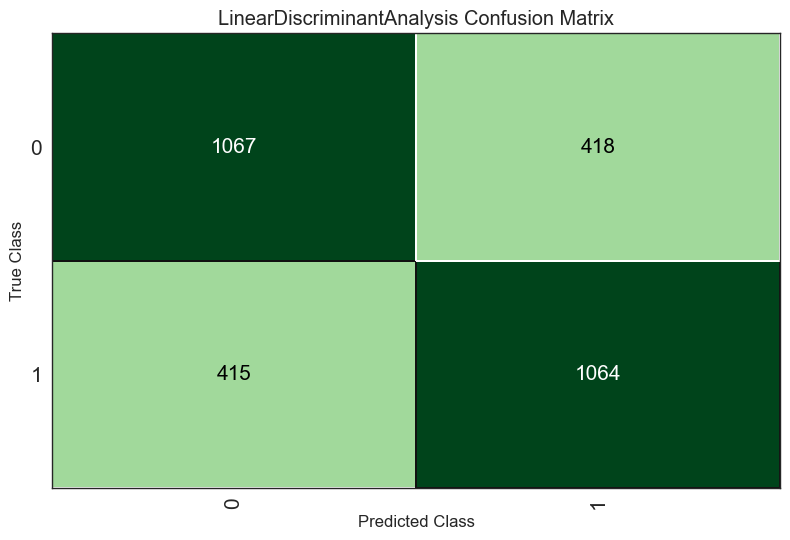

In [265]:
#Matriz de confusão para o modelo construído com Regressão Loística
plot_model(estimator=tuned_LDA,plot='confusion_matrix')

# Acurácia (Accuracy/Taxa de Acerto)
Esta é a métrica mais simples. É basicamente o número de acertos (positivos) divido pelo número total de exemplos. Ela deve ser usada em datasets com a mesma proporção de exemplos para cada classe, e quando as penalidades de acerto e erro para cada classe forem as mesmas.

Em problemas com classes desproporcionais, ela causa uma falsa impressão de bom desempenho. Por isso que foi necessário verificarmos se não existiam dados desbalanceados em nossa variável alvo (vitória do lado azul). Observe a imagem da matriz de confusão novamente para entender melhor.

Acurácia é uma métrica importante que pode ser derivada como:
$$accuracy=\frac{TP+TN}{P+N}$$

# Precisão (Precision)
Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe (positivos verdadeiros), dividido pela soma entre este número, e o número de exemplos classificados nesta classe, mas que pertencem a outras (falsos positivos).

Isso ficará mais claro quando formos explicar o funcionamento de uma matriz de confusão. Mas, observe a imagem da matriz para entender o cálculo da precisão:

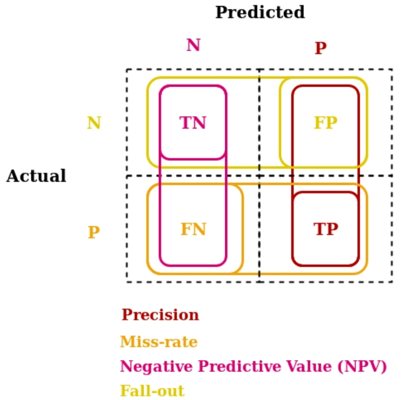

In [321]:
# Importando a imagem que explica a Precision
ur5 = "https://user-images.githubusercontent.com/110730862/227378421-f2ee3aea-24de-4316-bb49-130af40d58b2.png"
response5 = requests.get(ur5)
imagem5 = Image.open(BytesIO(response5.content))
nova_imagem5 = imagem5.resize((420, 400))
display(nova_imagem5)

Neste caso, precision representada pela cor em vermelho, é definida como:
    $$ precision = \frac{TP}{TP+FP} $$

# Recall
Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe, dividido pela quantidade total de exemplos que pertencem a esta classe, mesmo que sejam classificados em outra. No caso binário, positivos verdadeiros divididos por total de positivos. Observe a imagem da matriz de confusão para entender o cálculo do Recall:

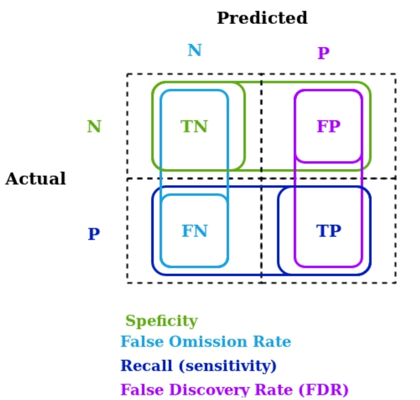

In [322]:
# Importando a imagem que explica o Recall
ur6 = "https://user-images.githubusercontent.com/110730862/227378530-f3df9054-aacc-48e8-9ebd-bde52e807c67.png"
response6 = requests.get(ur6)
imagem6 = Image.open(BytesIO(response6.content))
nova_imagem6 = imagem6.resize((420, 400))
display(nova_imagem6)

Neste caso, o recall representado pela cor em azul escuro, é definido como: $$Recall=\frac{TP}{TP+FN}$$

# F1 Score
O F1 Score é uma média harmônica entre precisão (que, apesar de ter o mesmo nome, não é a mesma citada acima) e recall. Veja abaixo as definições destes dois termos.

Ela é muito boa quando temos um conjunto de dados com classes desproporcionais, e o seu modelo não emite probabilidades. Isso não significa que não possa ser usada com modelos que emitem probabilidades, tudo depende do objetivo de sua tarefa de machine learning.

Em geral, quanto maior o F1 score, melhor.

O $F_{1}$-score é a média harmônica entre precision e recall: $$F_{1}=\frac{2\cdot Precision \cdot Recall}{Precision+Recall}$$

# Fall-out
O fall-out trata-se da proporção de classificados que não são daquela classe e são recuperados, de todos os classificados não pertecentes a classes que são disponíveis

Observe a imagem da matriz de confusão para entender o cálculo do Fall-out:

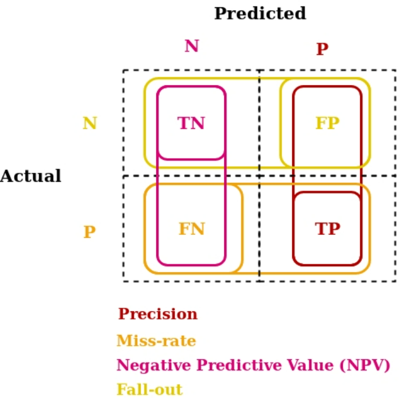

In [323]:
# Importando a imagem que explica o fall-out
ur7 = "https://user-images.githubusercontent.com/110730862/227378999-5a2a7e45-9633-4844-84a9-da29cf82945d.png"
response7 = requests.get(ur7)
imagem7 = Image.open(BytesIO(response7.content))
nova_imagem7 = imagem7.resize((420, 400))
display(nova_imagem7)

O fall-out (em amarelo) é definido como: $$fall-out=\frac{FP}{FP+TN}$$

* OBS: A medida de avaliação que deve ser mais levada em conta é a Acurácia (Accuracy), pois é uma medida comum de desempenho que é frequentemente usada para problemas de classificação binária ou multiclasse, especialmente quando as classes estão balanceadas. Isso ocorre porque a acurácia é uma medida geral e fácil de interpretar, que indica a proporção de instâncias classificadas corretamente pelo modelo.

# Curva ROC
A curva ROC (Receiver Operating Curve) é uma outra forma de avaliar o desempenho de classificadores. Sua origem remonta às telecomunicações, por isso o nome histórico.

O ROC é um gráfico cartesiano onde no eixo x encontra-se a métrica de fall-out (ou False Positive Ratio - FPR) e no eixo y a métrica de recall (sensitivity ou True Positive Ratio - TPR):

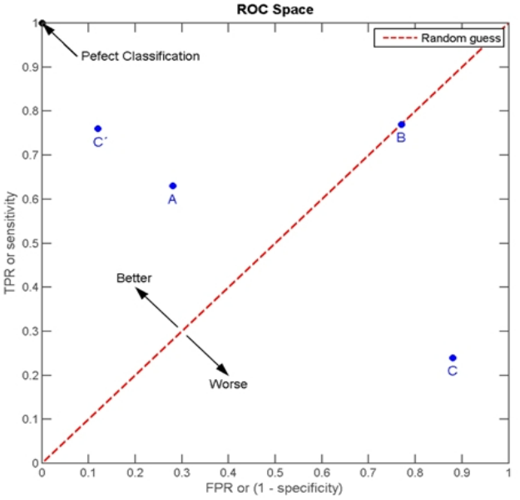

In [324]:
# Importando a imagem que explica a curva ROC
ur8 = "https://user-images.githubusercontent.com/110730862/227379176-bbbfe8ba-4aea-4fe4-8907-459f6173e8fd.png"
response8 = requests.get(ur8)
imagem8 = Image.open(BytesIO(response8.content))
nova_imagem8 = imagem8.resize((520, 500))
display(nova_imagem8)

Basicamente, o ROC é um gráfico do trade-off existente entre erros (representado pelo fall-out) e acertos (representado pelo recall) para diferentes fronteiras de decisão de um classificador.

A fronteira de decisão (linha que separa) aqui pode ser, por exemplo, o threshold de probabilidade que separa a classe negativa da classe positiva.

Como a saída do nosso classificador é a probabilidade do dado ser da classe positiva, valores de saída abaixo do threshold significam que o dado será previsto como sendo da classe negativa

Valores de saída acima do threshold significam que o dado será previsto como sendo da classe positiva. Por exemplo, uma probabilidade igual a 0.6 de ser da classe positiva significa considerar o dado como sendo da classe positiva para um threshold igual a 0.3, mas não para um threshold igual a 0.8.

Idealmente, um classificador deveria ter sempre um único ponto no ROC: (0,1). Isso significaria que o classificador é capaz de identificar um dado da classe positiva 100% das vezes (recall==1) e nunca classificaria um dado da classe negativa como sendo da classe positiva (fall-out==0). Infelizmente, isso nunca acontece.

Como queremos ter um modelo que seja melhor que o classificador aleatório, devemos buscar um classificador cujo ROC seja uma curva sempre acima da reta $y=x$. Curvas abaixo da reta $y=x$ significam que o classificador se comporta pior do que chutes aleatórios sobre as classes.

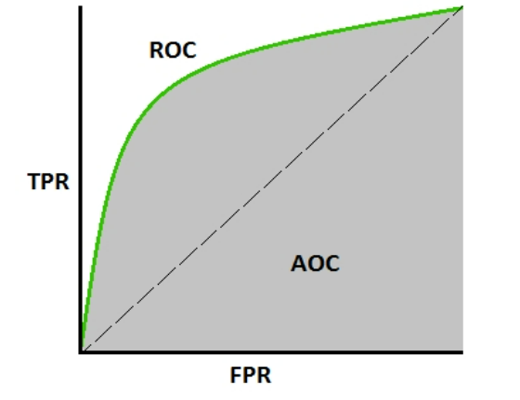

In [325]:
# Importando a imagem que explica a curva ROC
ur9 = "https://user-images.githubusercontent.com/110730862/227379410-7371bd1e-8aeb-4f5a-9d4c-72dda746697a.png"
response9 = requests.get(ur9)
imagem9 = Image.open(BytesIO(response9.content))
nova_imagem9 = imagem9.resize((520, 400))
display(nova_imagem9)

Apesar de visualmente ser fácil avaliar o desempenho de um classificador usando a curva ROC, é difícil comparar o desempenho geral de múltiplos classificadores. E uma forma de sumarizar o desempenho do classificador usando o ROC é através da área embaixo da curva ROC: AUC (Area Under Curve).

A AUC do ROC é uma métrica que vai de 0 a 1. Quanto mais próximo de 1, melhor é o desempenho geral do classificador.

Comparar classificadores com AUC é uma tarefa trivial: o classificador com maior AUC possui o melhor desempenho geral. É fácil ver que a AUC de um classificador aleatório é 0.5, logo qualquer classificador com AUC superior a 0.5 é um classificador melhor do que chutes aleatórios.

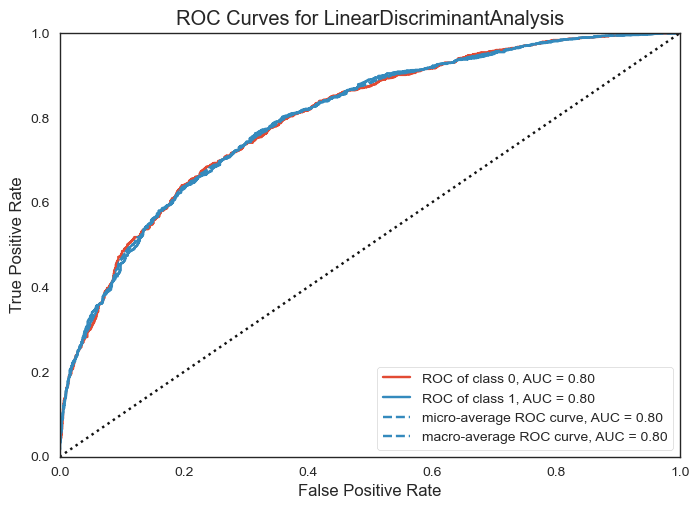

In [272]:
plot_model(tuned_LDA)

Observando o gráfico da curva ROC do nosso modelo, fica claro que o nosso classificador possui uma curva ROC acima da reta $y=x$. Logo, possivelmente o nosso modelo se comporta melhor que o classificador aleatório.

Além disso, nossa AUC possui o valor de 0.8, ou seja, o classificador possui um bom desempenho geral, por o valor está próximo de 1. E como visto anteriormente, qualquer classificador com AUC superior a 0.5 é um classificador melhor do que chutes aleatórios.

# Conclusão
## Previsões do modelo
O PyCaret já divide os dados na proporção de treinamento e teste 70:30 ao carregar, então não temos que fazer isso manualmente, como fizemos para o modelo de XGBClassifier, utilizando essa mesma proporção para a divisão dos dados. Claro, se for visto que é necessário alterar a proporção, isso pode ser feito, o que deve ser levado em conta para o tamanho da proporção dos conjuntos de dados que serão criados é os critérios discutidos anteriormente, sobre o tamanho do conjunto de dados e a aplicação do modelo.

In [268]:
#Realizando a previsão do modelo
predictions = predict_model(tuned_LDA)

Note que o modelo diminuiu um pouco o desempenho, após realizarmos a previsão, e para avaliar ainda mais o desempenho do modelo, poderíamos então treinar e testar o modelo com dados de novas partidas, que nunca foram vistos anteriormente, porém, lembrar que os nossos dados foram treinados para partidas do nível diamante 1 ao mestre, se o modelo for treinado com uma amostra de dados muito difirente, como o caso de partidas de um nível muito abaixo, o modelo pode acabar não tendo um bom desempenho.

## Salvando o modelo
Antes de salvar o modelo em um arquivo, precisamos finalizá-lo:

In [270]:
#Finalizando o modelo
finalize_model(tuned_LDA)

Pipeline(memory=FastMemory(location=C:\Users\marci\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['WardsDestroyed', 'FirstBlood',
                                             'Kills', 'Deaths', 'Assists',
                                             'EliteMonsters', 'Dragons',
                                             'Heralds', 'TowersDestroyed',
                                             'AvgLevel',
                                             'TotalJungleMinionsKilled',
                                             'GoldDiff', 'ExperienceDiff',
                                             'KDA'],
                                    transformer=SimpleI...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True

In [271]:
#Salvando o modelo
save_model(tuned_LDA, 'LDA_LeagueOfLegends')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\marci\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['WardsDestroyed', 'FirstBlood',
                                              'Kills', 'Deaths', 'Assists',
                                              'EliteMonsters', 'Dragons',
                                              'Heralds', 'TowersDestroyed',
                                              'AvgLevel',
                                              'TotalJungleMinionsKilled',
                                              'GoldDiff', 'ExperienceDiff',
                                              'KDA'],
                                     transformer=SimpleI...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                         

A partir dos resultados obtidos com as métricas de avaliação de um classificador e o resultado preditivo do modelo, fica claro que o modelo está desempenhando bem, mas poderia ser melhorado e claro por o conjunto de dados não ter tanta "sujeira", facilitou o trabalho. Além disso, para o projeto está ainda mais completo, ficou faltando a realização da entrega do modelo, ou melhor, a realização de um deploy, o que será feito posteriormente. Por enquanto, podemos finalizar este projeto por aqui e espero que isso tenha sido útil não só para mim, quanto para você também. Abraços!!